In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 按照dtypes读入数据

In [2]:
dtypes = {
    'Year': 'category',
    'Month': 'category',
    'DayofMonth': 'category',
    'DayOfWeek': 'category',
    'Operating_Airline': 'category',
    'Origin': 'category',
    'Dest': 'category',
    'DepDelay': 'float64',
    'DepTimeBlk': 'category',
    'ArrDelay': 'float64',
    'ArrTimeBlk': 'category',
    'Cancelled': 'int64',
    'CRSElapsedTime': 'float64',
    'ActualElapsedTime': 'float64',
    'Distance': 'int64',
    'WeatherDelay': 'float64',
    'Origin_HourlyAltimeterSetting': 'float64',
    'Origin_HourlyDewPointTemperature': 'float64',
    'Origin_HourlyDryBulbTemperature': 'float64',
    'Origin_HourlyPrecipitation': 'float64',
    'Origin_HourlyRelativeHumidity': 'float64',
    'Origin_HourlySeaLevelPressure': 'float64',
    'Origin_HourlyVisibility': 'float64',
    'Origin_HourlyWindDirection': 'category',
    'Origin_HourlyWindGustSpeed': 'float64',
    'Origin_HourlyWindSpeed': 'float64',
    'Dest_HourlyAltimeterSetting': 'float64',
    'Dest_HourlyDewPointTemperature': 'float64',
    'Dest_HourlyDryBulbTemperature': 'float64',
    'Dest_HourlyPrecipitation': 'float64',
    'Dest_HourlyRelativeHumidity': 'float64',
    'Dest_HourlySeaLevelPressure': 'float64',
    'Dest_HourlyVisibility': 'float64',
    'Dest_HourlyWindDirection': 'category',
    'Dest_HourlyWindGustSpeed': 'float64',
    'Dest_HourlyWindSpeed': 'float64'
}

In [3]:
data_final = pd.read_csv('final_data.csv', dtype=dtypes)

### ratio of missing data

In [4]:
# 计算每一列的缺失值比例
missing_ratio = data_final.isna().mean() * 100

# 循环输出每一列的缺失值比例
for column, ratio in missing_ratio.items():
    print(f"{column}: {ratio:.2f}%")

Year: 0.00%
Month: 0.00%
DayOfWeek: 0.00%
Operating_Airline : 0.00%
Origin: 0.00%
Dest: 0.00%
DepDelay: 1.92%
DepTimeBlk: 0.00%
ArrDelay: 1.97%
ArrTimeBlk: 0.00%
Cancelled: 0.00%
ActualElapsedTime: 1.97%
Distance: 0.00%
Origin_HourlyAltimeterSetting: 0.00%
Origin_HourlyDewPointTemperature: 0.00%
Origin_HourlyDryBulbTemperature: 0.00%
Origin_HourlyPrecipitation: 0.00%
Origin_HourlyRelativeHumidity: 0.00%
Origin_HourlySeaLevelPressure: 0.00%
Origin_HourlyVisibility: 0.00%
Origin_HourlyWindDirection: 0.00%
Origin_HourlyWindGustSpeed: 0.00%
Origin_HourlyWindSpeed: 0.00%
Dest_HourlyAltimeterSetting: 0.00%
Dest_HourlyDewPointTemperature: 0.00%
Dest_HourlyDryBulbTemperature: 0.00%
Dest_HourlyPrecipitation: 0.00%
Dest_HourlyRelativeHumidity: 0.00%
Dest_HourlySeaLevelPressure: 0.00%
Dest_HourlyVisibility: 0.00%
Dest_HourlyWindDirection: 0.00%
Dest_HourlyWindGustSpeed: 0.00%
Dest_HourlyWindSpeed: 0.00%
Holiday: 0.00%


In [5]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700585 entries, 0 to 9700584
Data columns (total 34 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   Year                              category
 1   Month                             category
 2   DayOfWeek                         category
 3   Operating_Airline                 object  
 4   Origin                            category
 5   Dest                              category
 6   DepDelay                          float64 
 7   DepTimeBlk                        category
 8   ArrDelay                          float64 
 9   ArrTimeBlk                        category
 10  Cancelled                         int64   
 11  ActualElapsedTime                 float64 
 12  Distance                          int64   
 13  Origin_HourlyAltimeterSetting     float64 
 14  Origin_HourlyDewPointTemperature  float64 
 15  Origin_HourlyDryBulbTemperature   float64 
 16  Origin_HourlyPreci

### 每列的density或者bar

数据太大选取1%来画density

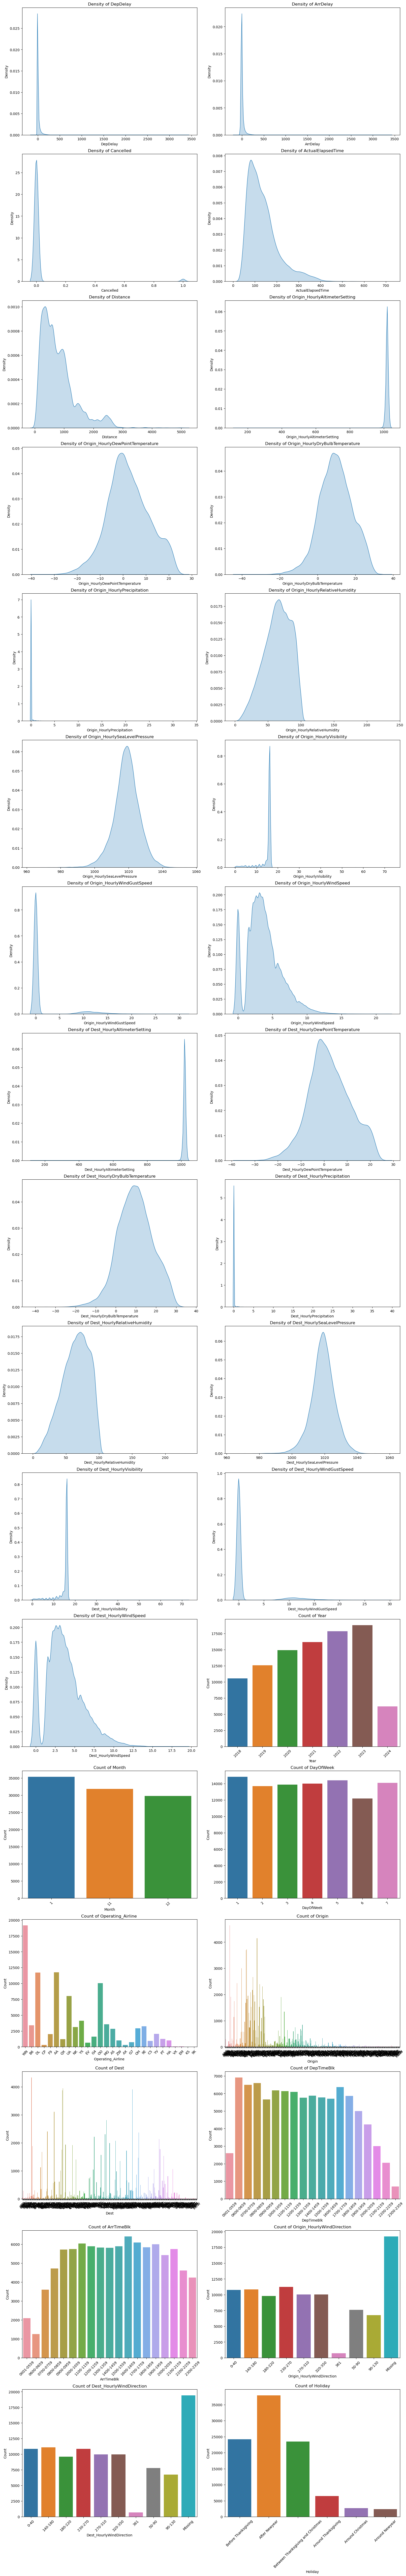

In [7]:
# 随机选取 1% 的数据
data_sample = data_final.sample(frac=0.01, random_state=42)

# 增加图表整体大小
plt.figure(figsize=(16, len(data_sample.columns) * 3))

# 获取数值型和分类型的列
numeric_columns = data_sample.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data_sample.select_dtypes(exclude=['int64', 'float64']).columns

# 数值型列绘制密度图
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + len(categorical_columns) + 1) // 2, 2, i)
    sns.kdeplot(data_sample[column], fill=True)
    plt.title(f'Density of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# 分类型列绘制条形图
for j, column in enumerate(categorical_columns, len(numeric_columns) + 1):
    plt.subplot((len(numeric_columns) + len(categorical_columns) + 1) // 2, 2, j)
    sns.countplot(x=column, data=data_sample)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# 使用 constrained_layout 进行布局
plt.gcf().set_constrained_layout(True)
plt.show()

## Data Visualization

### 计算取消率与各列关系

In [8]:
columns_to_drop = ['ArrDelay']
data_selected = data_final.drop(columns=columns_to_drop)

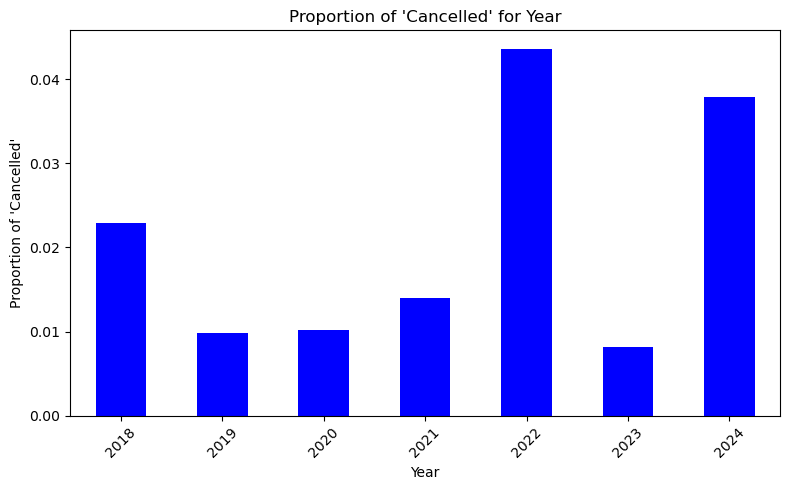

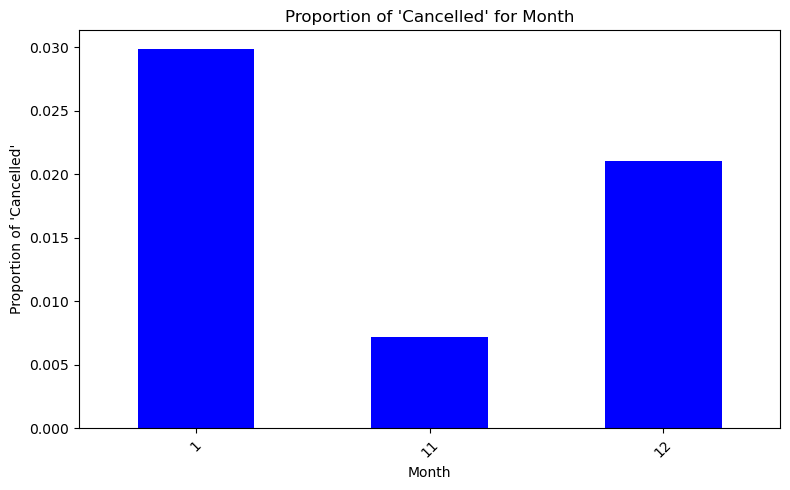

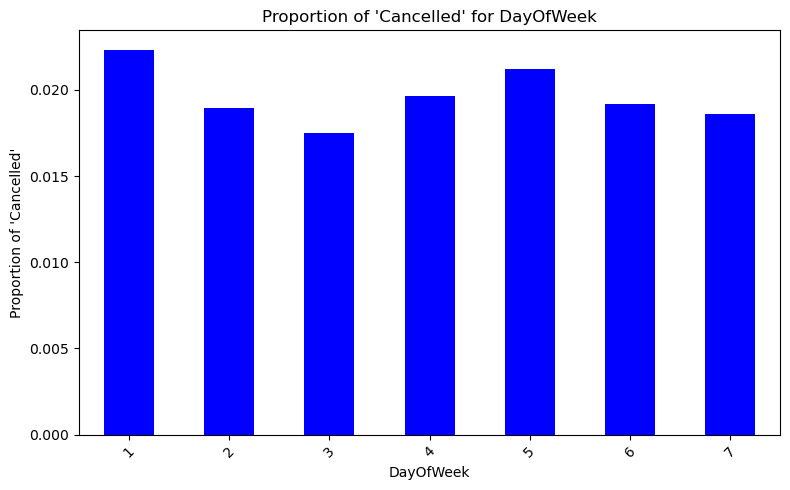

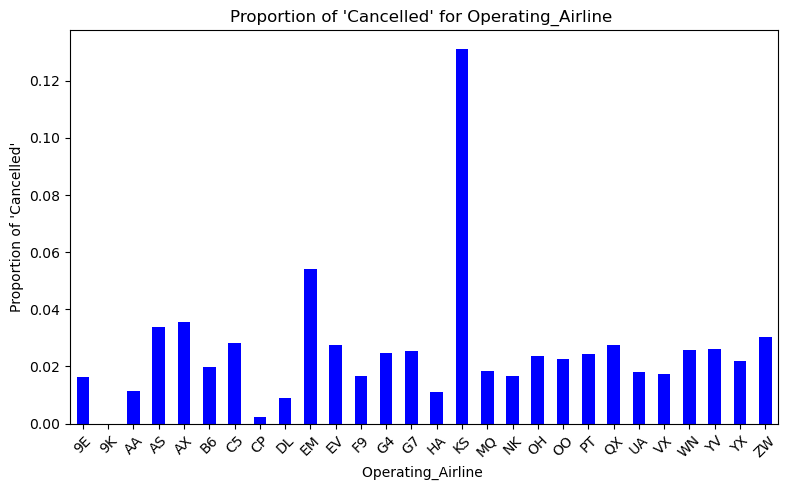

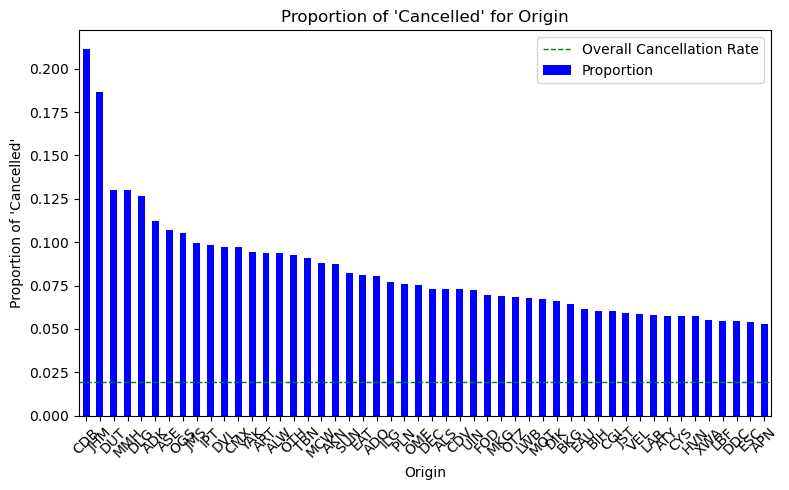

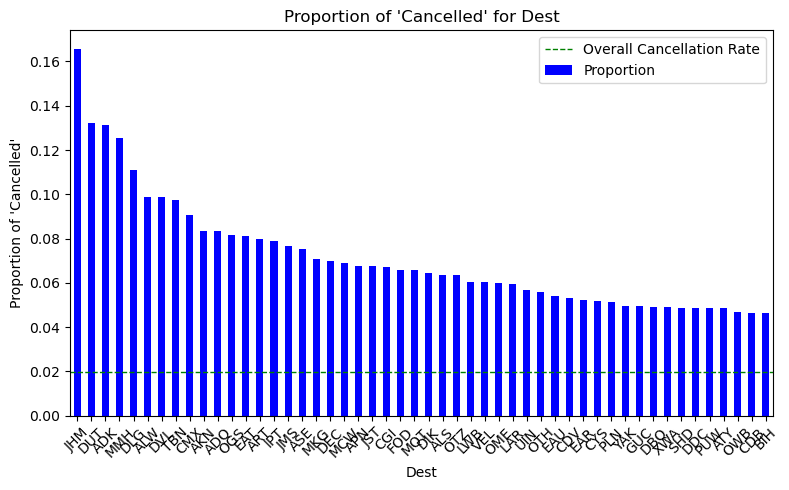

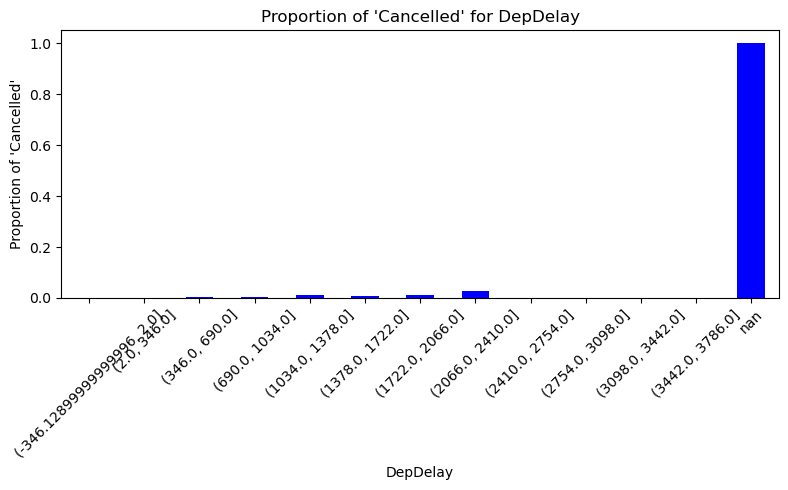

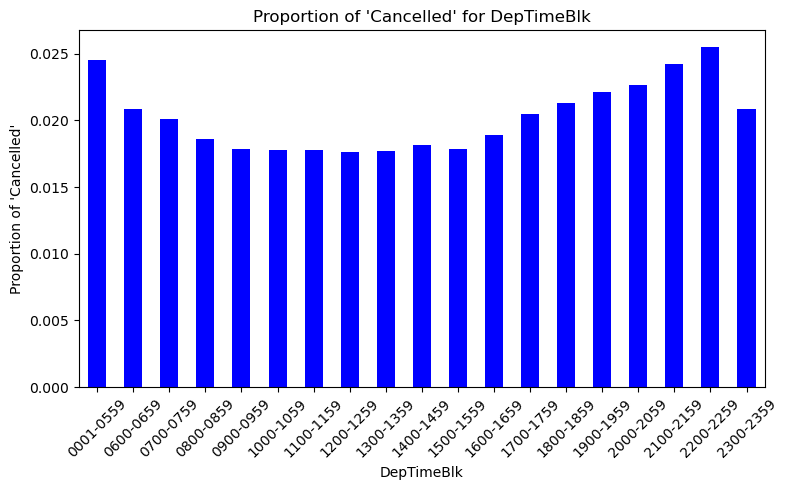

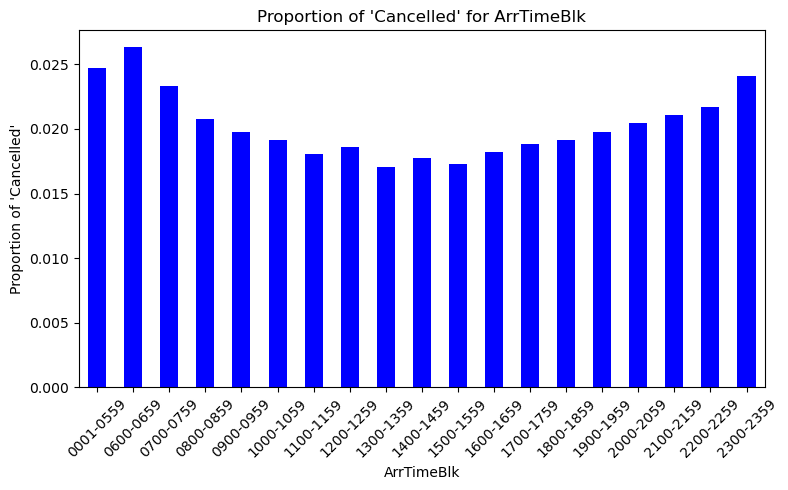

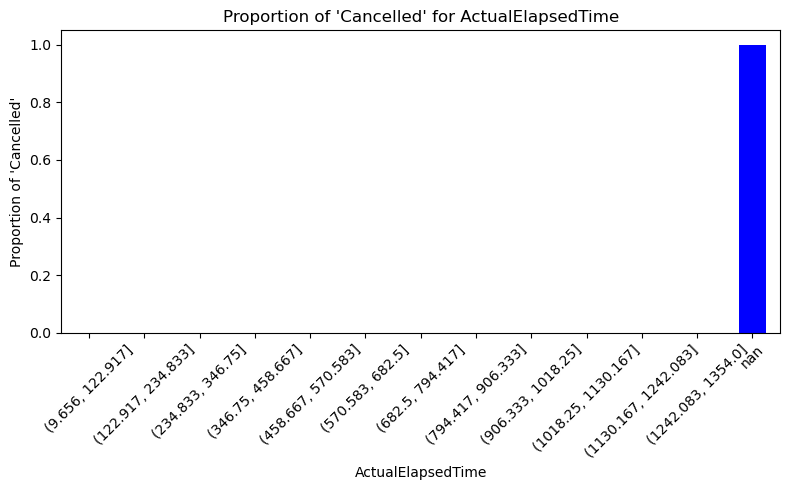

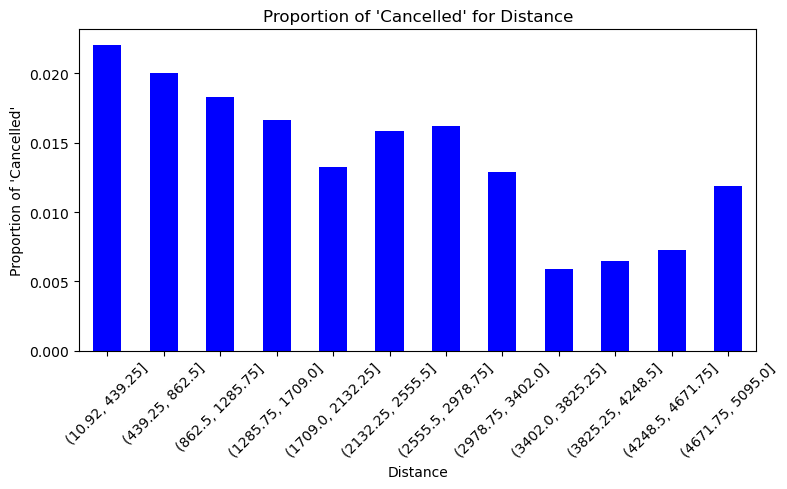

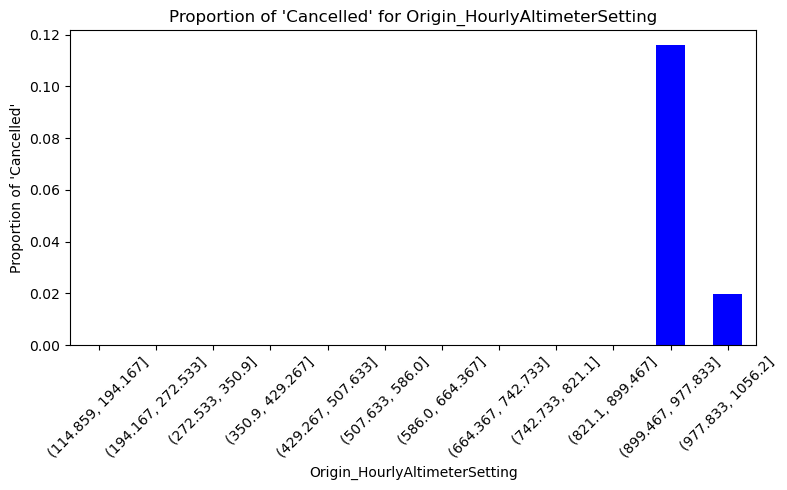

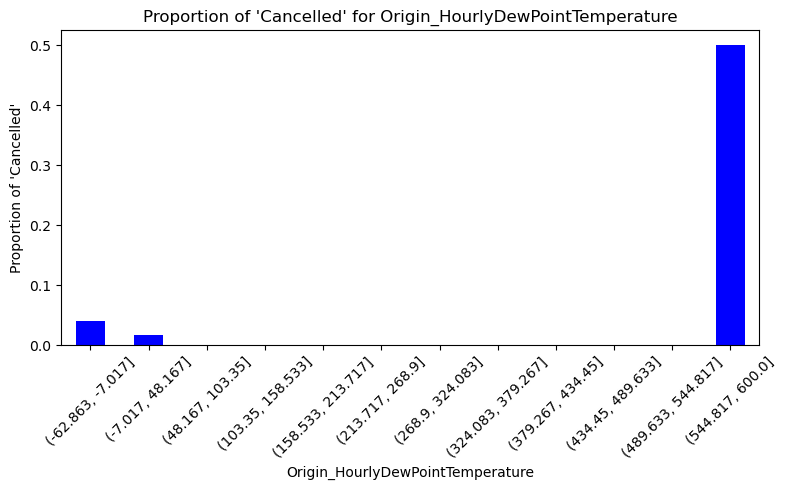

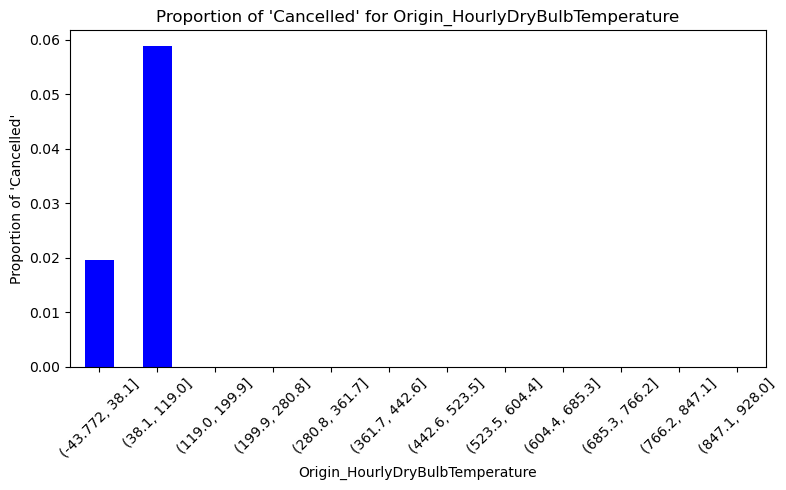

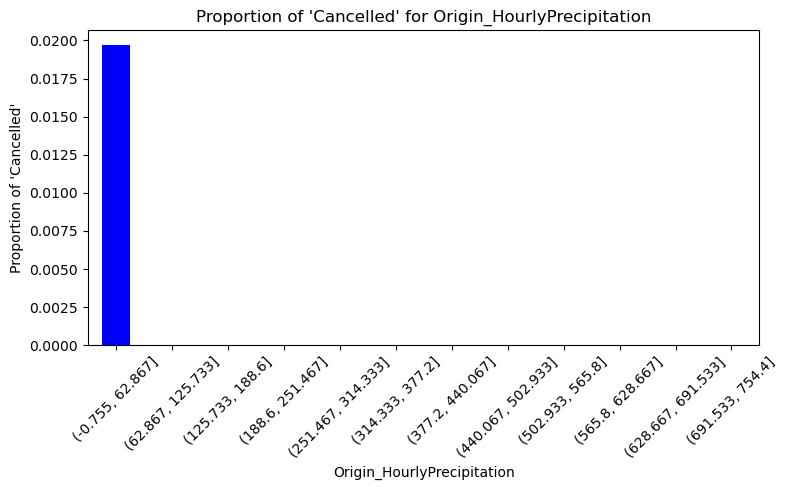

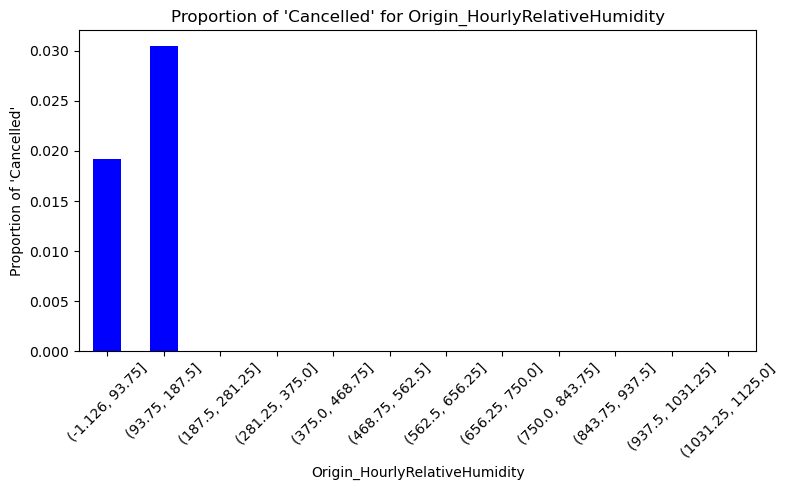

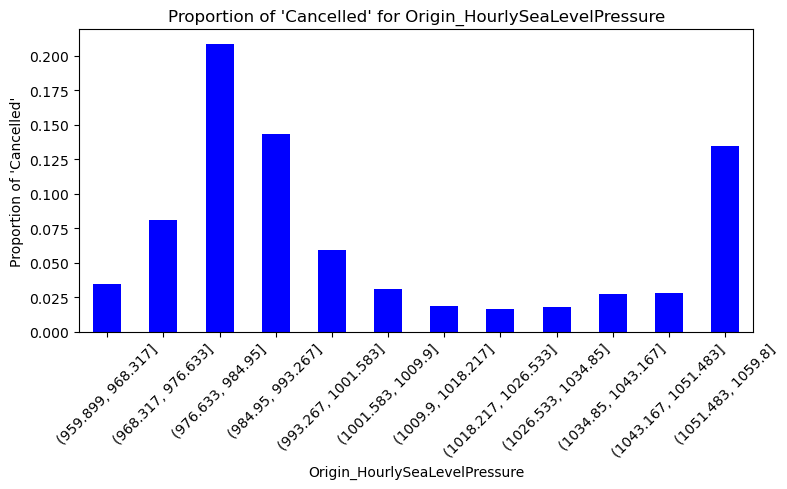

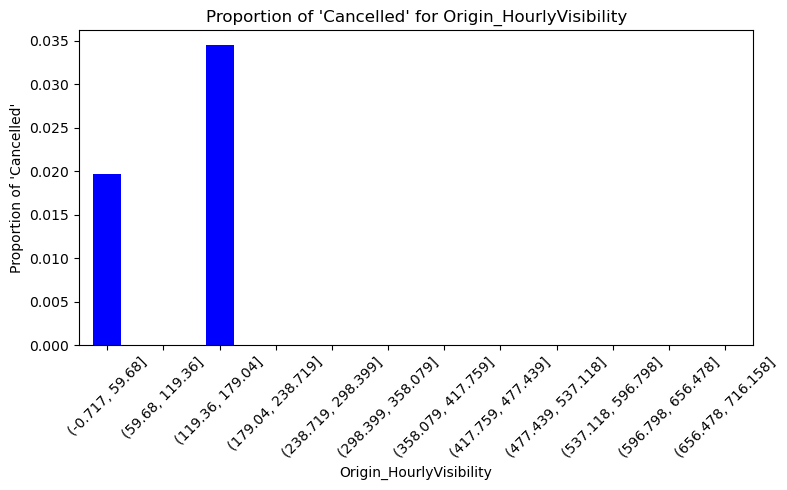

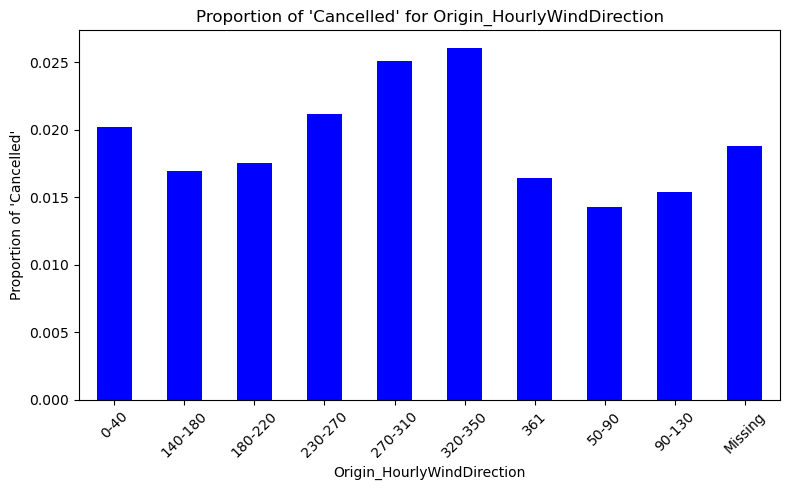

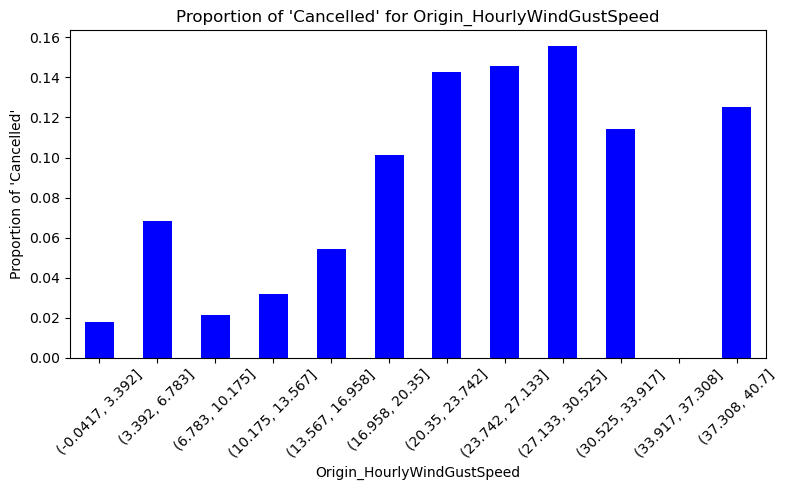

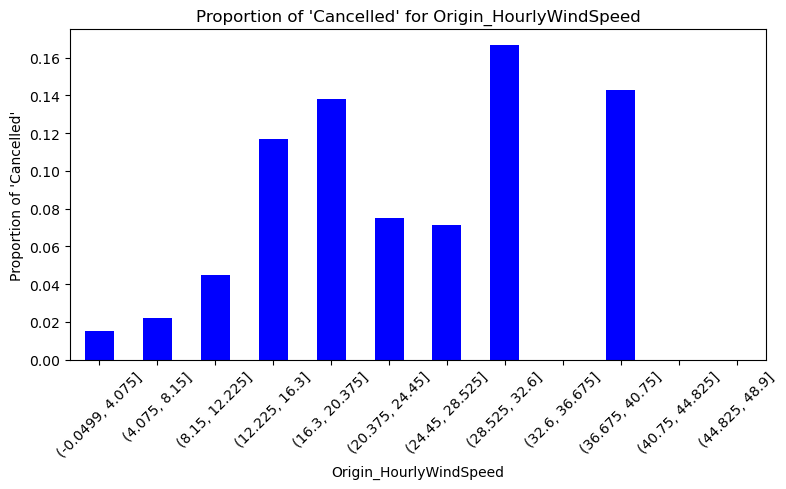

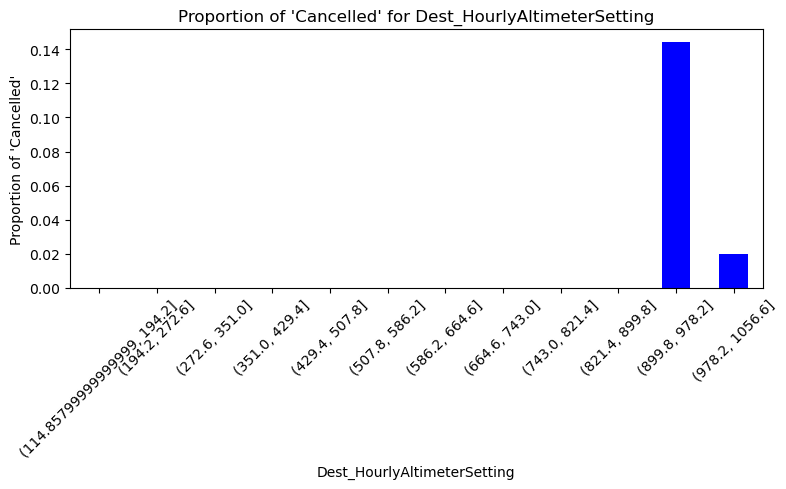

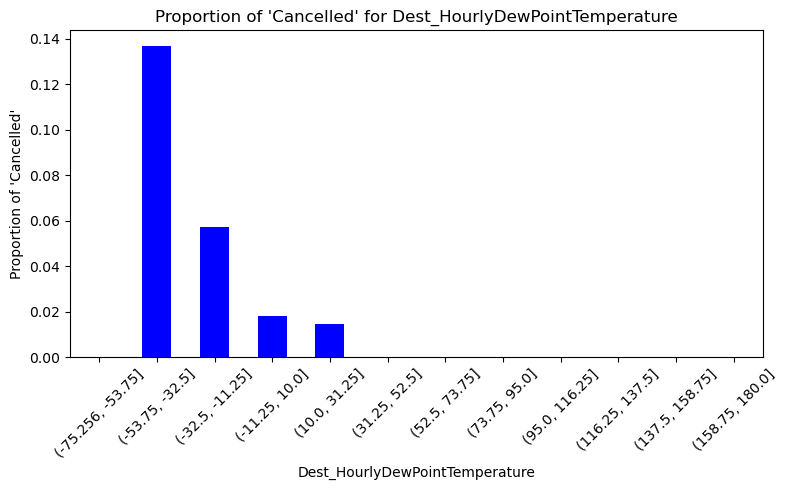

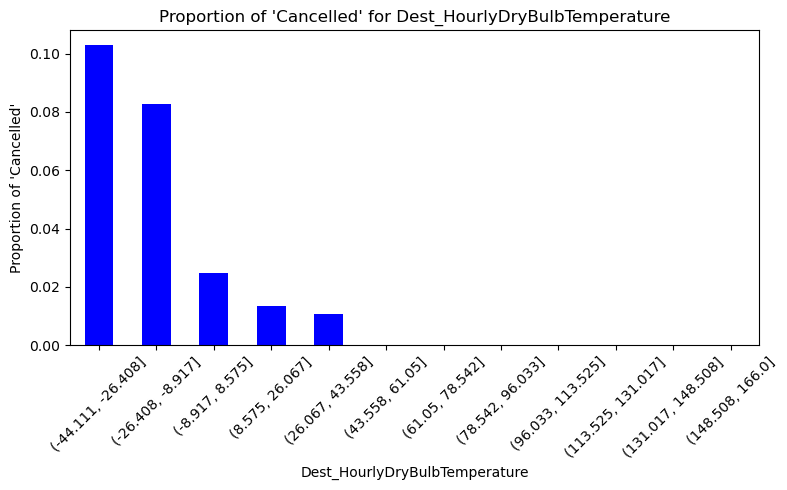

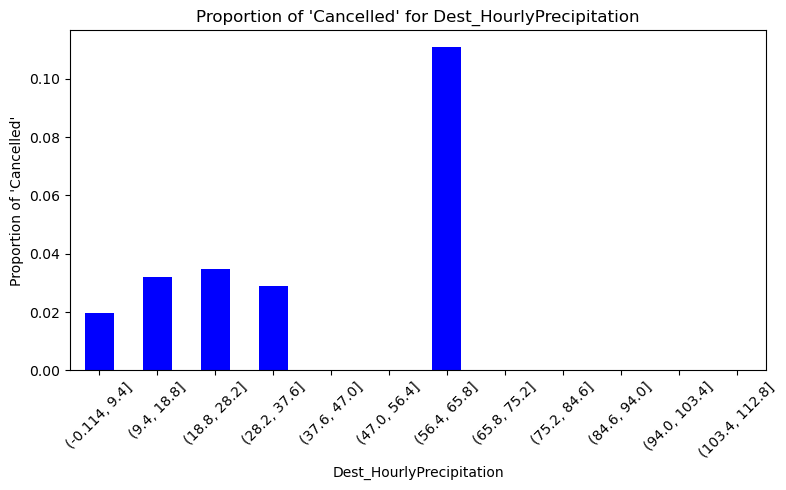

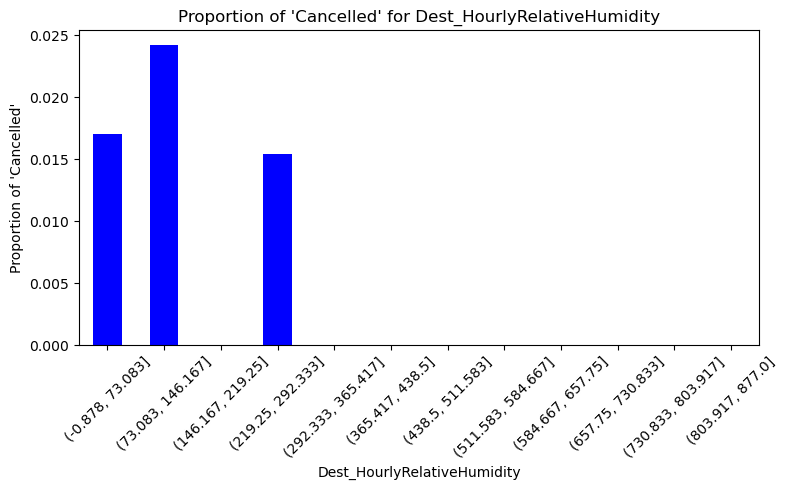

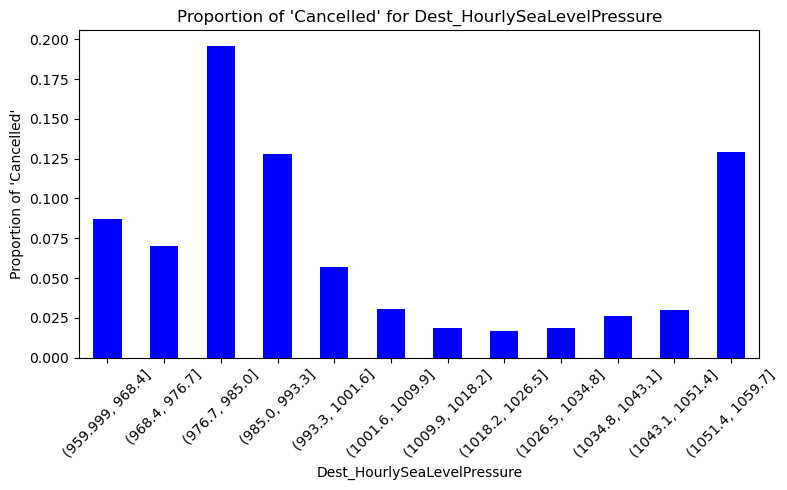

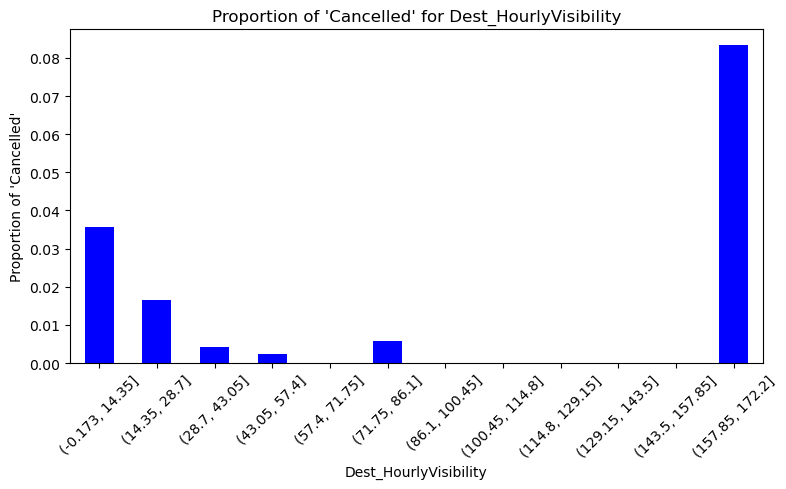

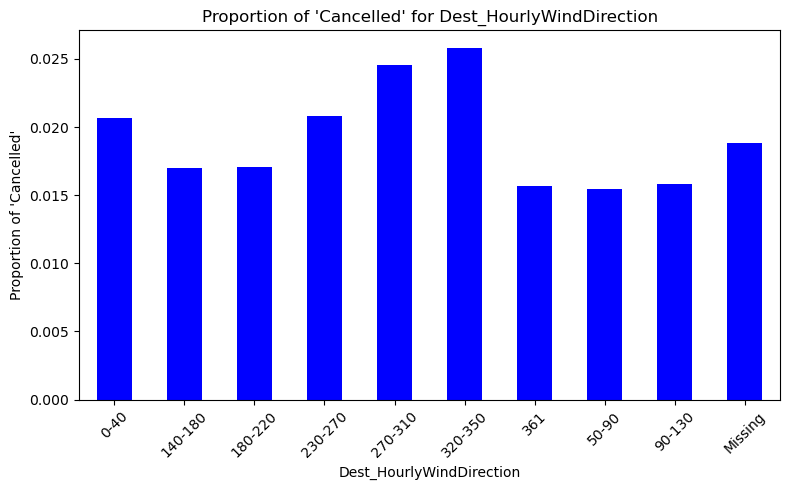

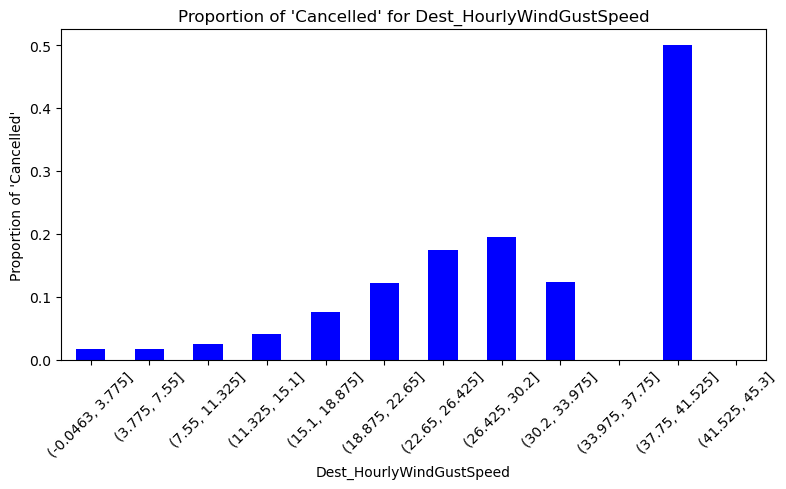

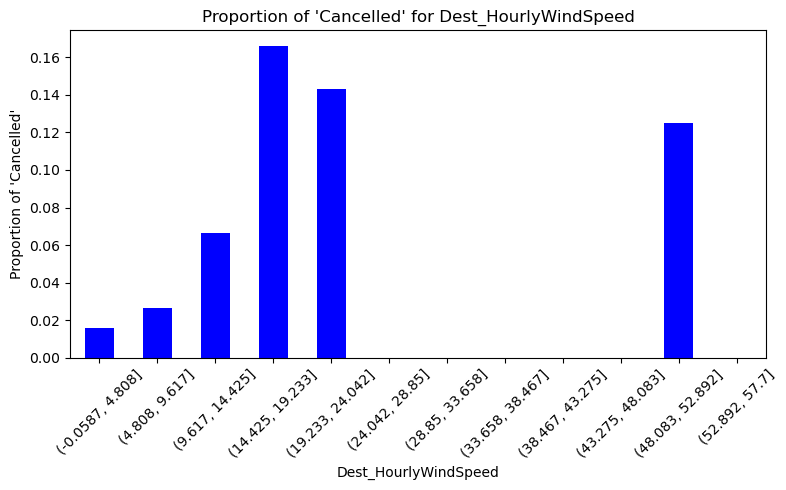

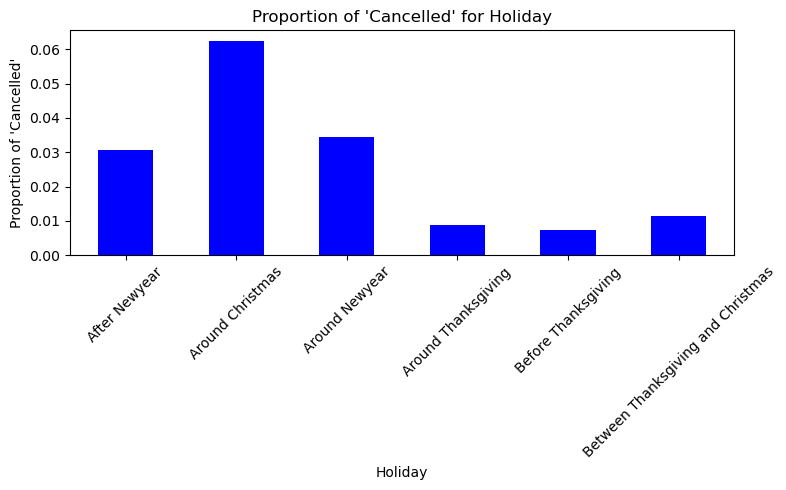

In [9]:
# Calculate the overall cancellation rate for reference
overall_cancellation_rate = data_selected['Cancelled'].mean()

# Initialize dictionary to store individual proportion DataFrames for each column
proportion_frames = {}

for column in data_selected.columns:
    if column == 'Cancelled':
        continue
    if data_selected[column].dtype in ['int64', 'float64']:
        # Numeric columns: create 20 bins, calculate 'Cancelled' proportions, include NA as a separate bar
        binned = pd.cut(data_selected[column], bins=12, include_lowest=True)
        grouped = data_selected.groupby(binned)['Cancelled'].apply(lambda x: (x == 1).mean()).reset_index(name='Proportion')
        if data_selected[column].isna().any():
            na_prop = (data_selected[data_selected[column].isna()]['Cancelled'] == 1).mean()
            grouped = pd.concat([grouped, pd.DataFrame([{'Cancelled': 'NA', 'Proportion': na_prop}])])
        grouped['Category'] = grouped[column].astype(str)
    else:
        # Categorical columns: calculate 'Cancelled' proportions
        grouped = data_selected.groupby(column)['Cancelled'].apply(lambda x: (x == 1).mean()).reset_index(name='Proportion')
        grouped.rename(columns={column: 'Category'}, inplace=True)
        if data_selected[column].isna().any():
            na_prop = (data_selected[data_selected[column].isna()]['Cancelled'] == 1).mean()
            grouped = pd.concat([grouped, pd.DataFrame([{'Category': 'NA', 'Proportion': na_prop}])])
        
        # Limit to top 50 categories if there are more than 50 unique values
        if len(grouped) > 50:
            grouped = grouped.sort_values(by='Proportion', ascending=False).head(50)
    
    proportion_frames[column] = grouped

# Generate separate plots for each column with NA marked in red
for column, df in proportion_frames.items():
    fig, ax = plt.subplots(figsize=(8, 5))
    colors = ['red' if category == 'NA' else 'blue' for category in df['Category']]
    df.plot(kind='bar', x='Category', y='Proportion', ax=ax, color=colors, legend=False)

    # Add overall cancellation rate as a green line for columns with more than 50 unique values
    if len(df) == 50:
        ax.axhline(overall_cancellation_rate, color='green', linestyle='--', linewidth=1, label='Overall Cancellation Rate')

    ax.set_title(f"Proportion of 'Cancelled' for {column}")
    ax.set_xlabel(f"{column}")
    ax.set_ylabel("Proportion of 'Cancelled'")
    if len(df) == 50:
        ax.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### DepDelay与其他列的关系

In [10]:
columns_to_drop = ['Cancelled']
data_selected2 = data_final.drop(columns=columns_to_drop)

### ArrDelay mean

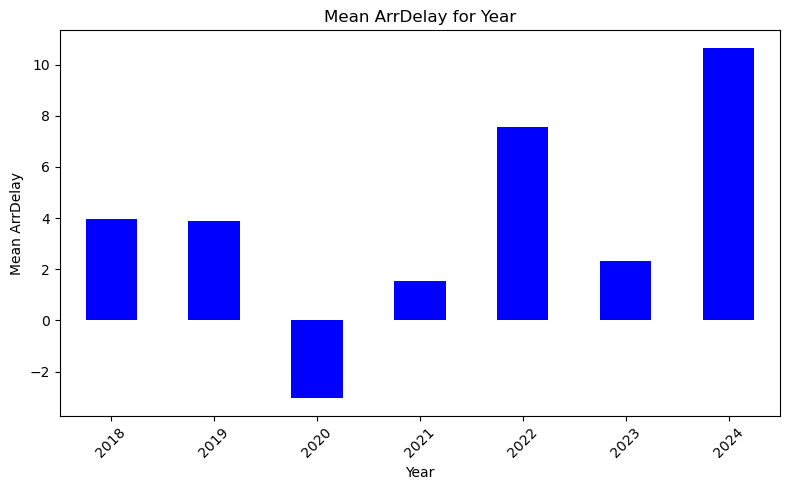

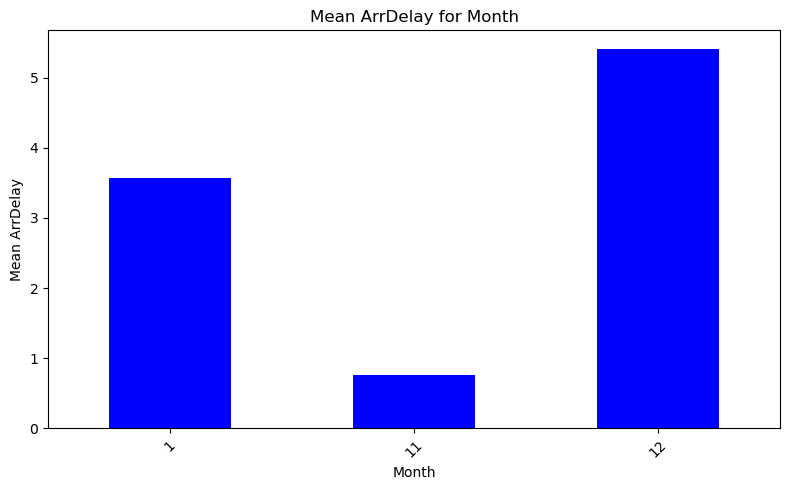

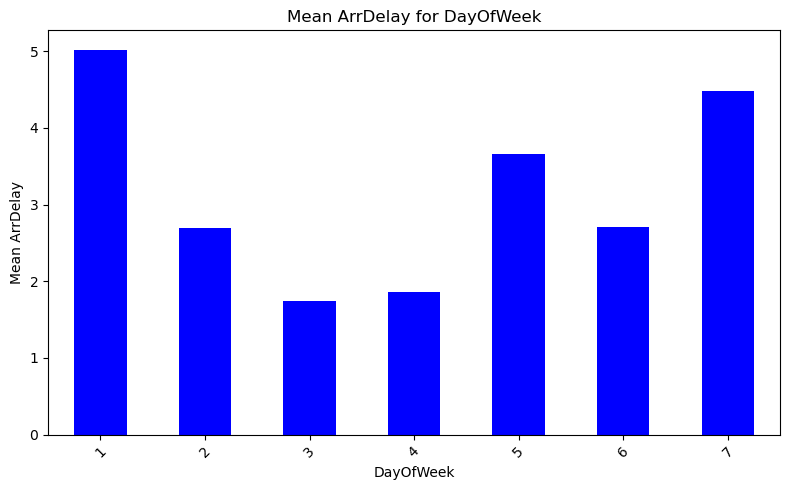

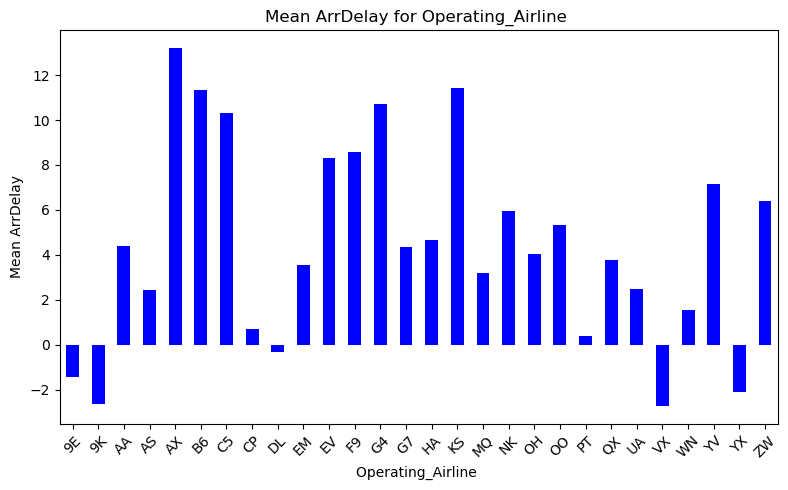

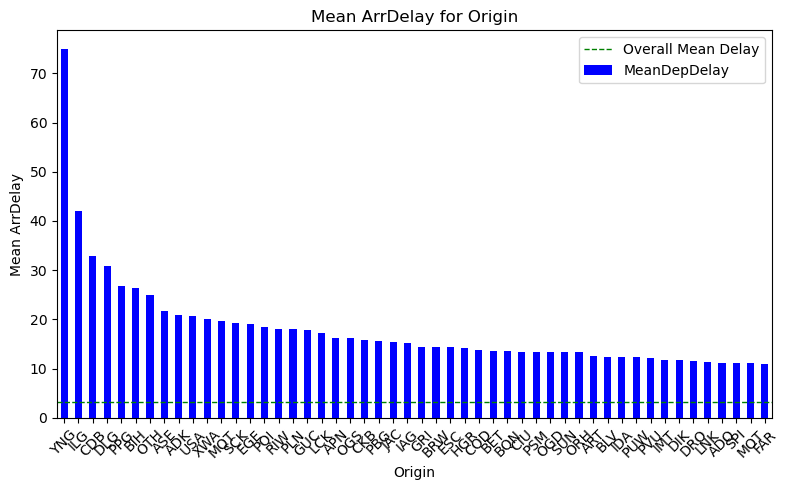

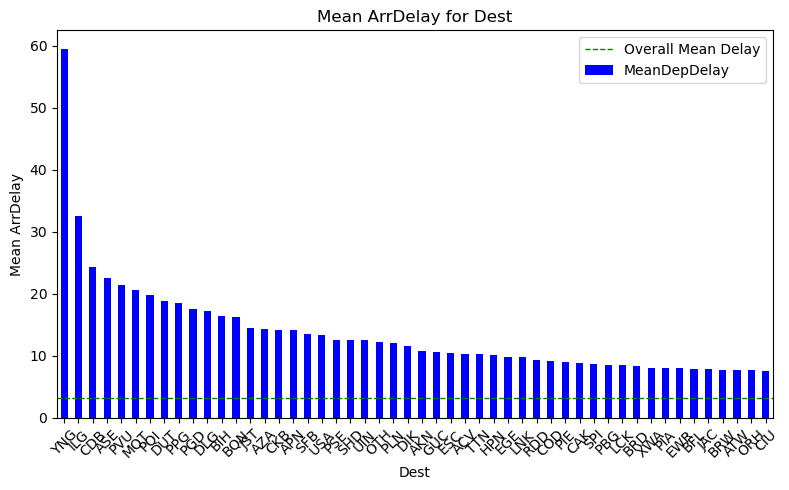

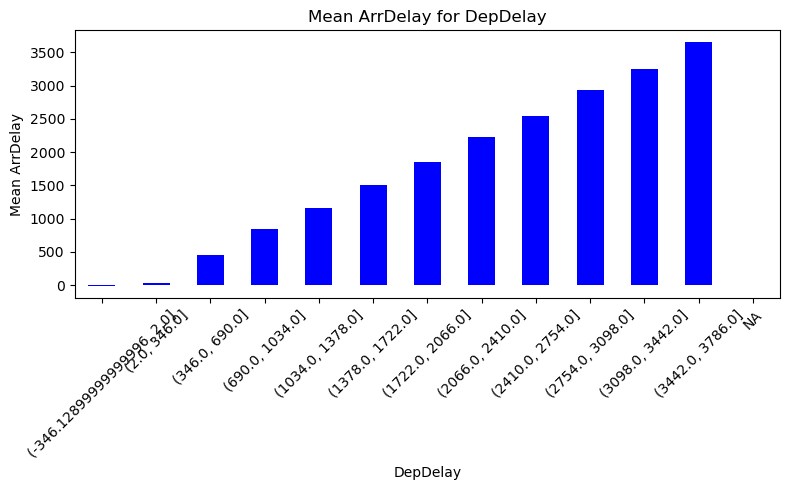

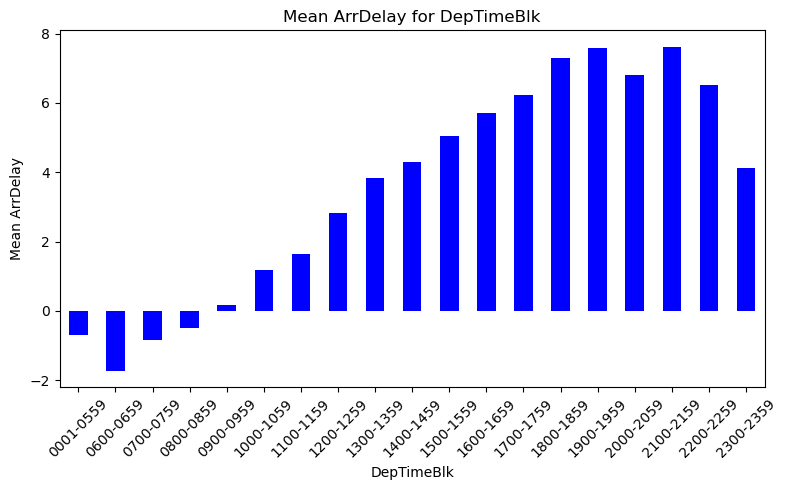

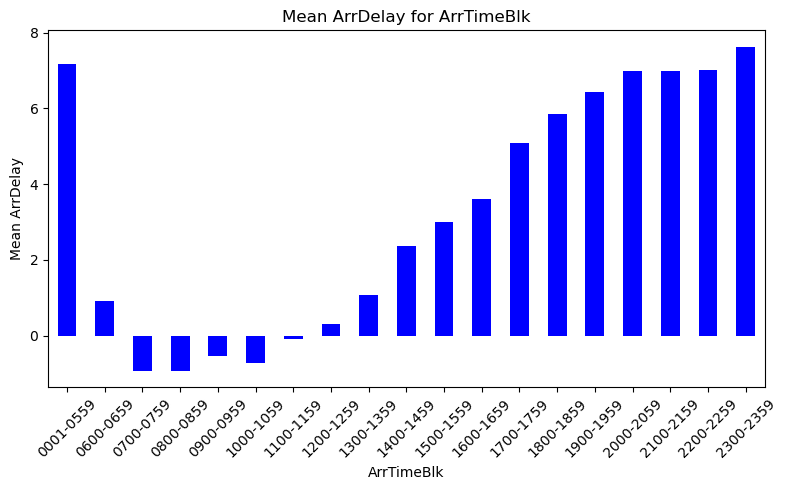

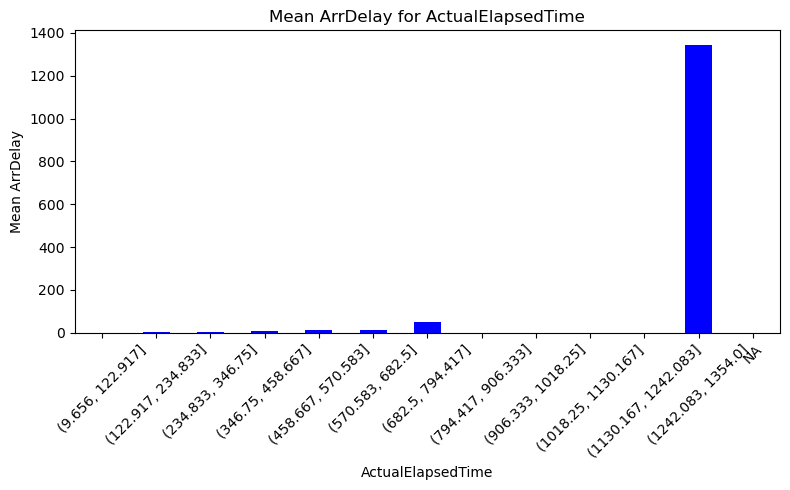

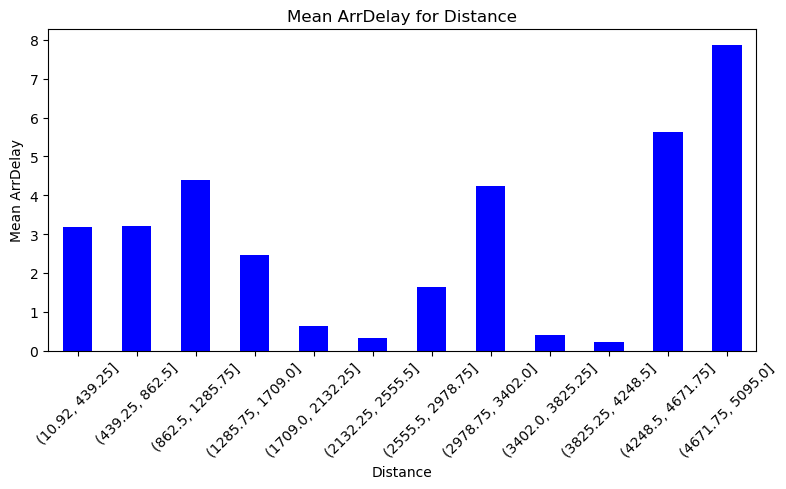

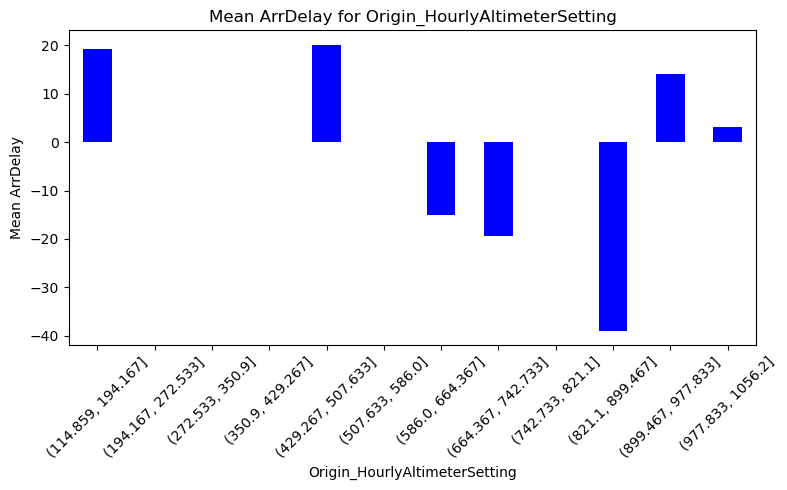

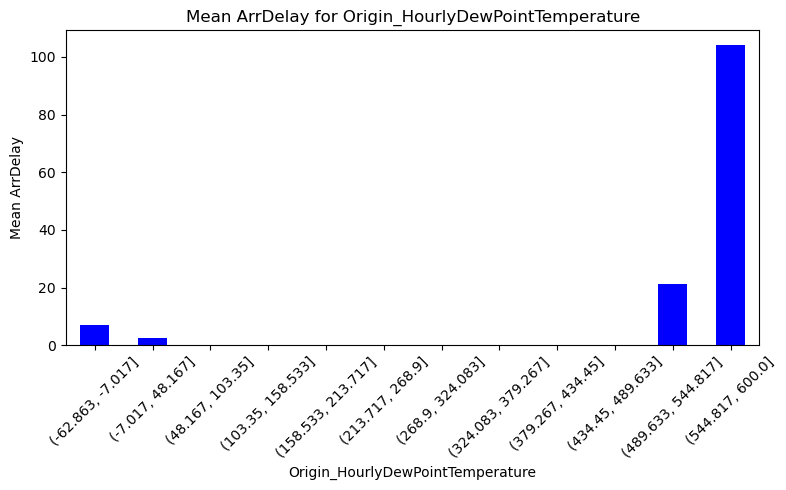

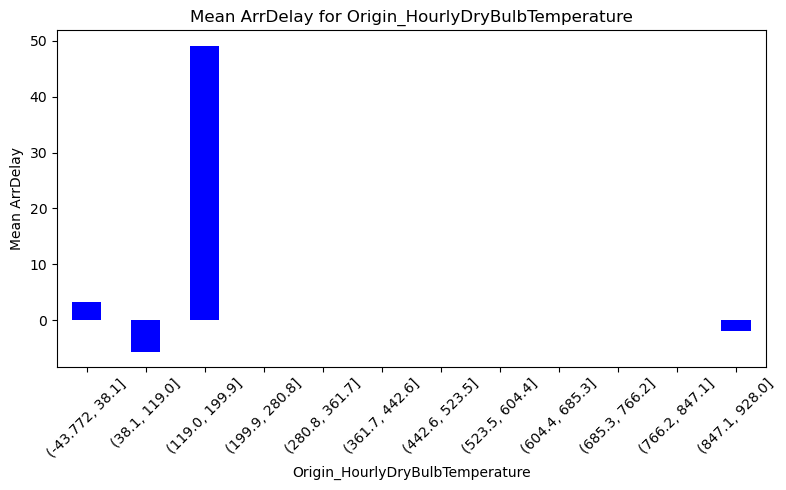

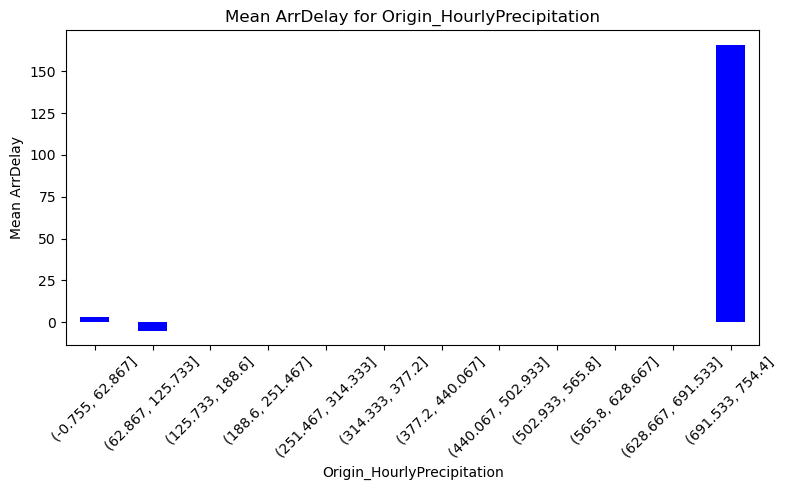

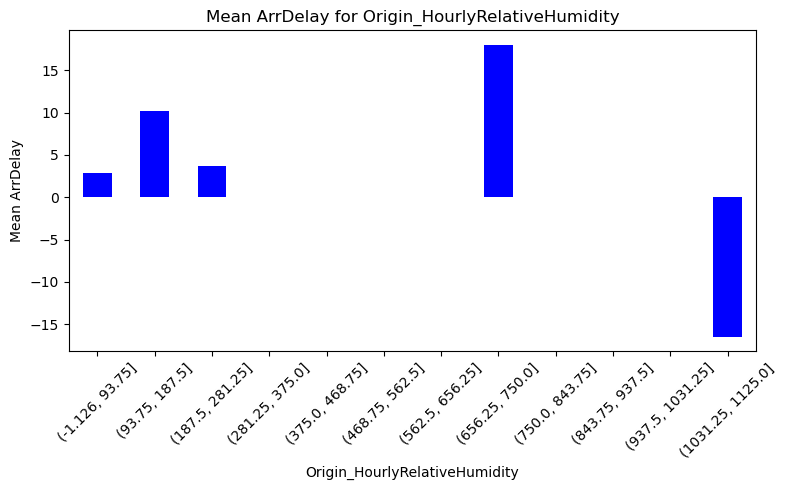

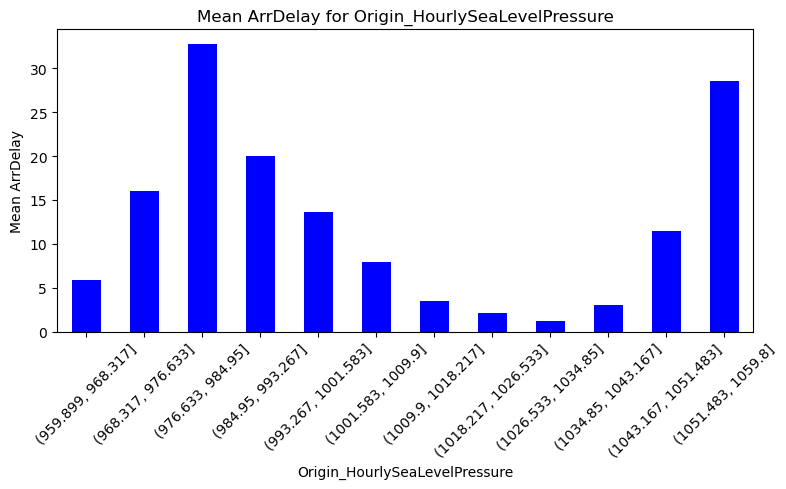

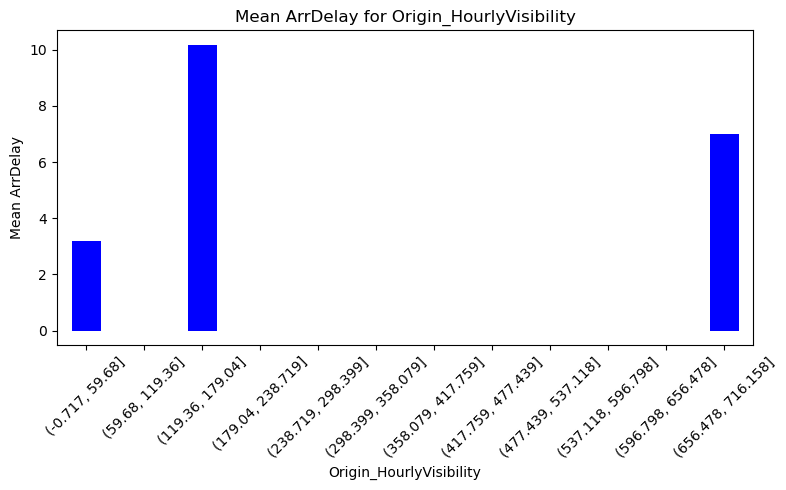

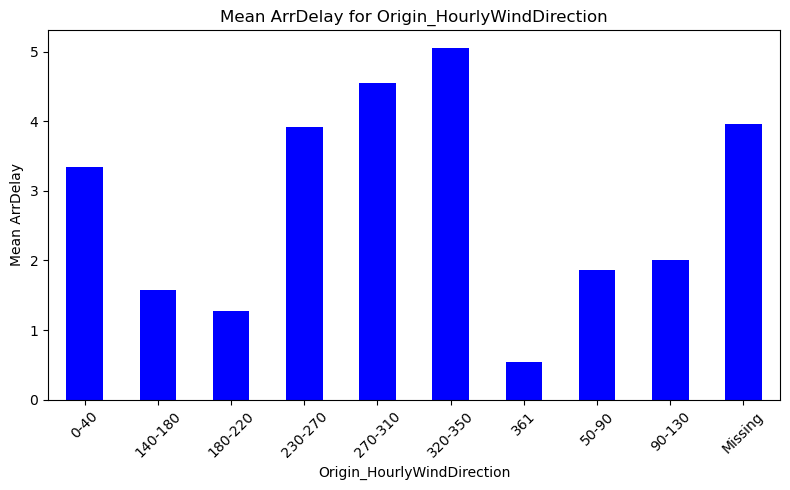

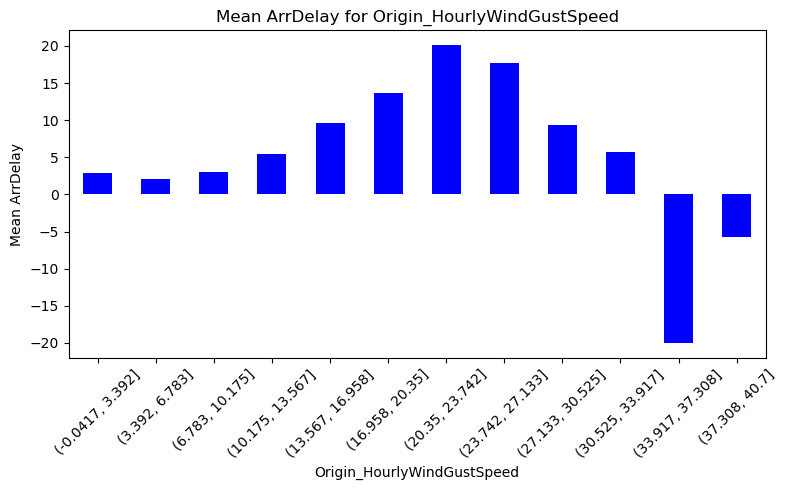

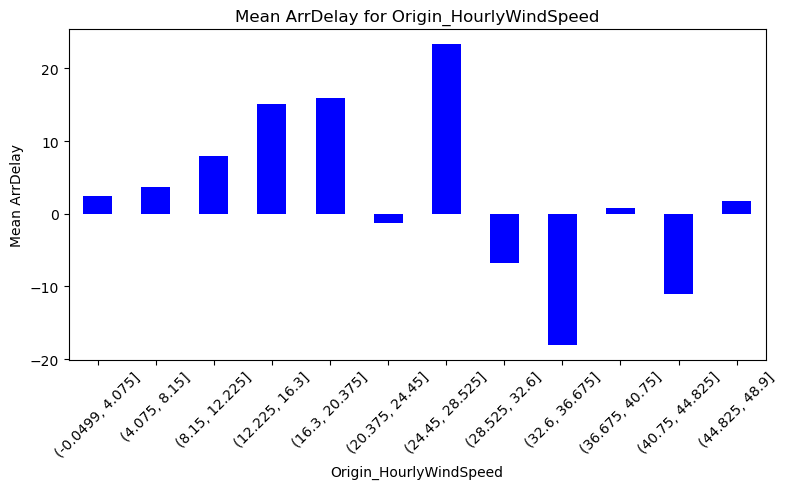

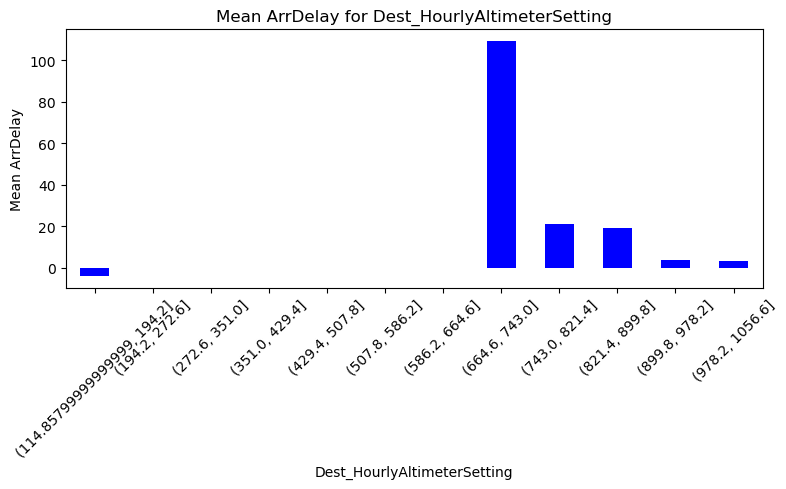

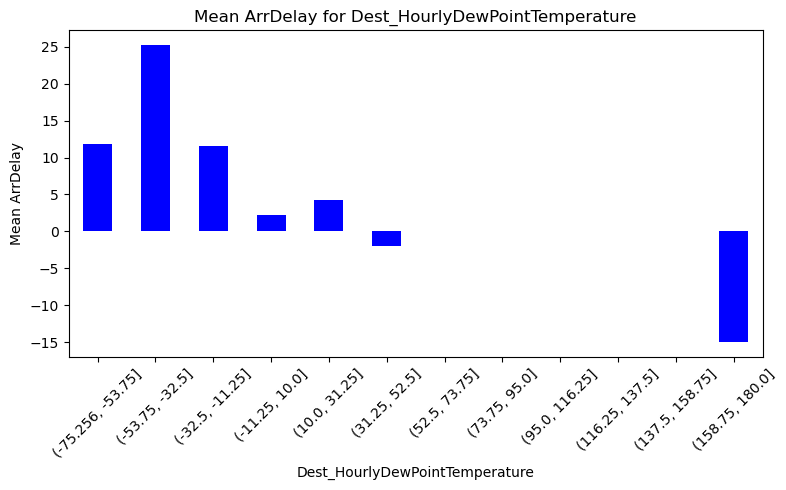

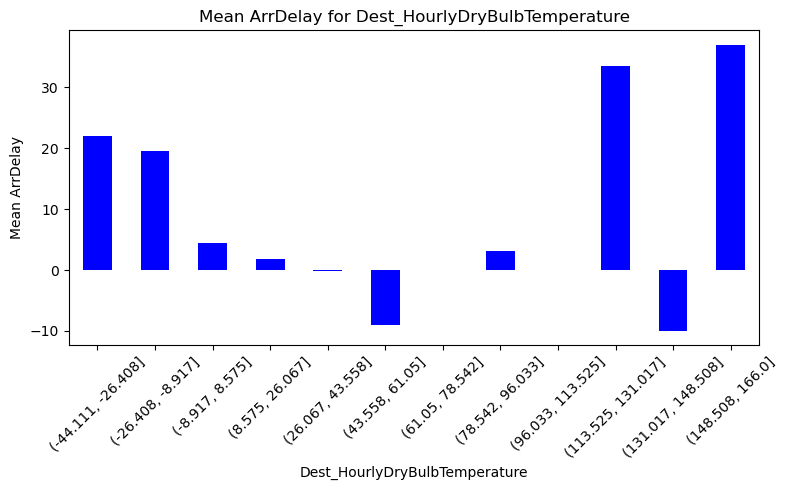

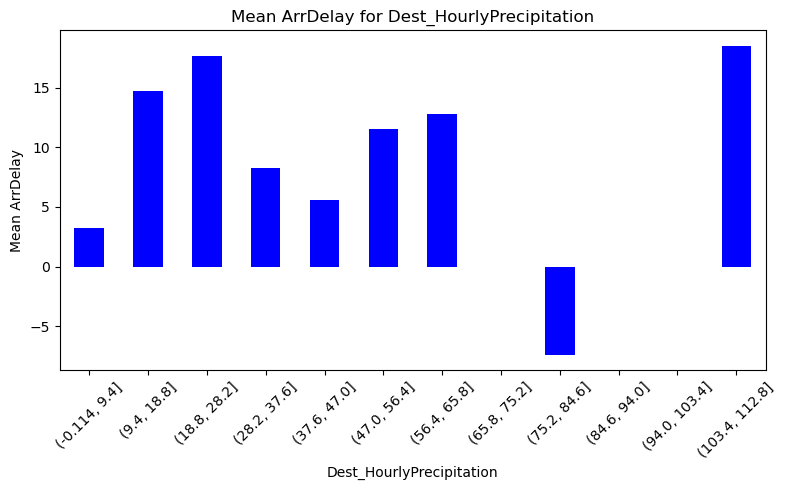

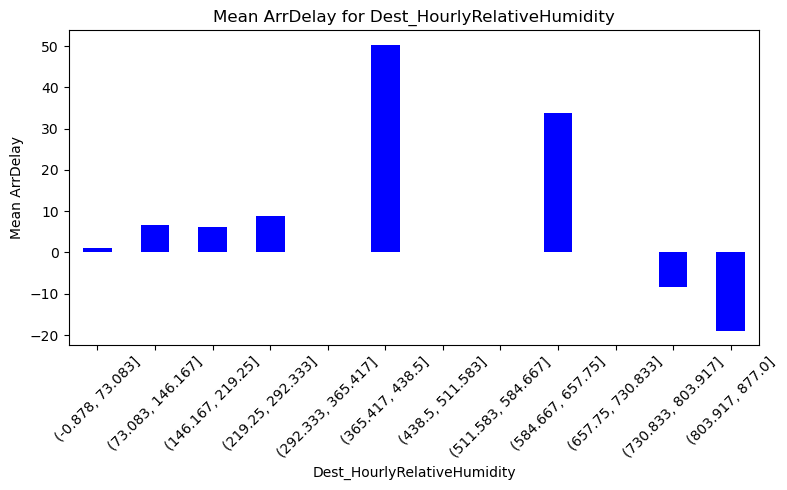

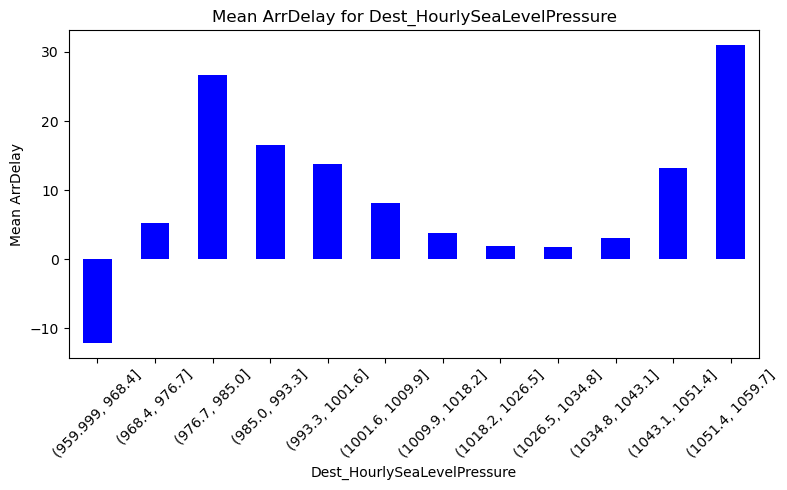

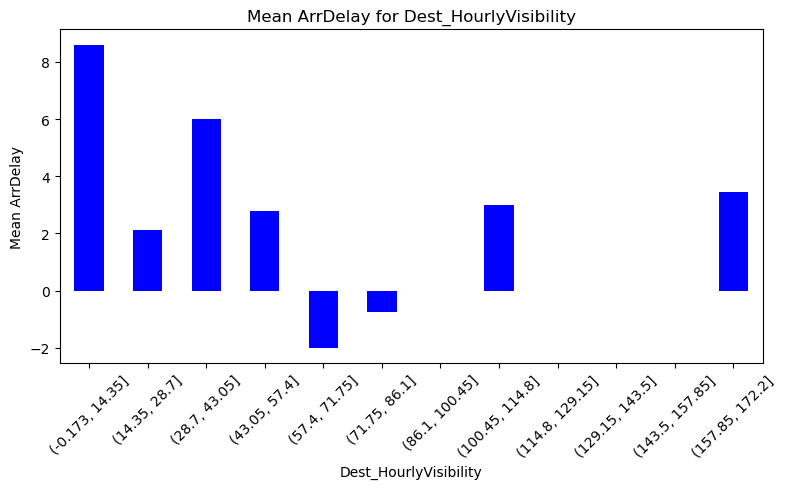

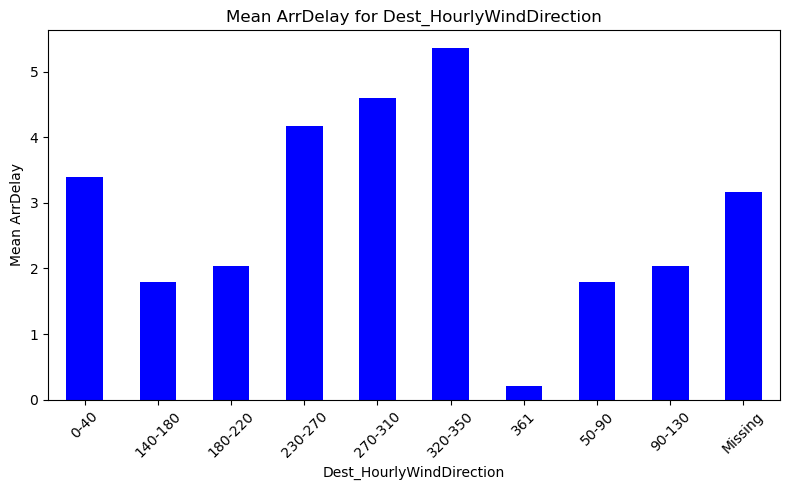

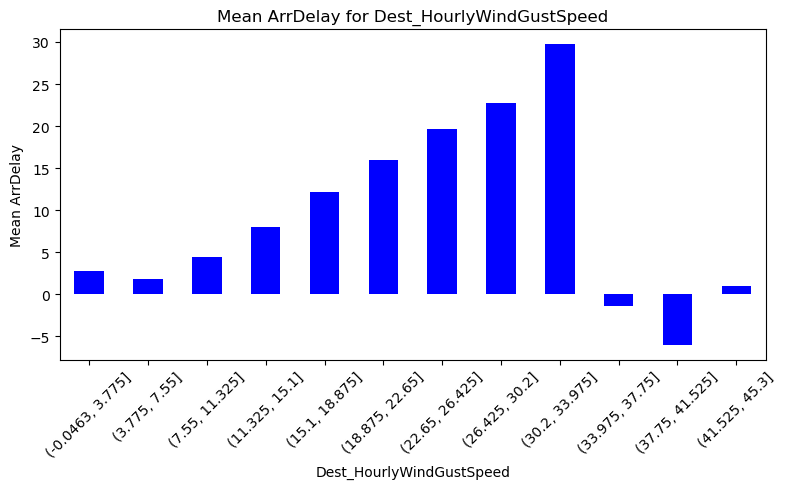

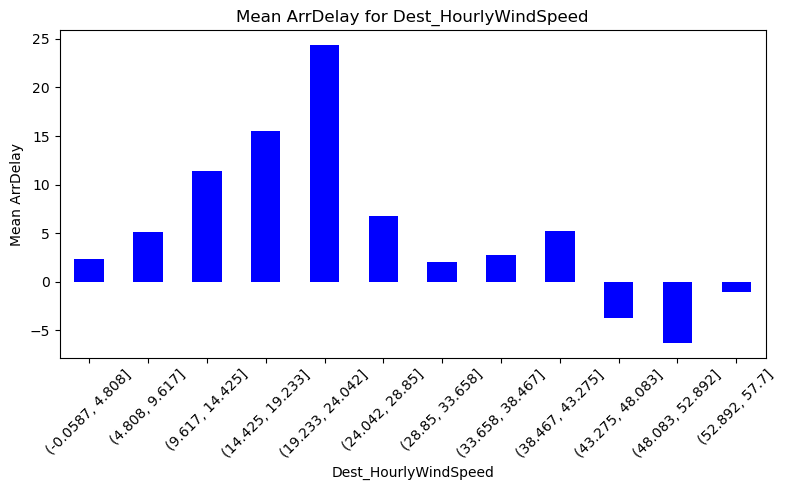

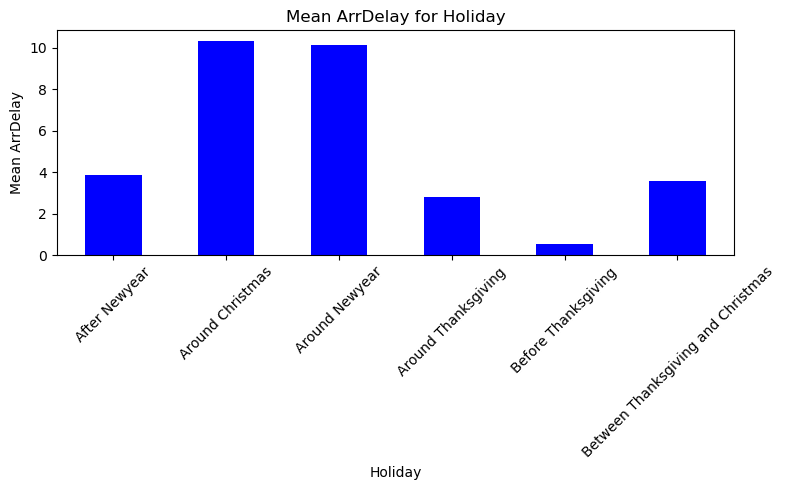

In [11]:
mean_delay_frames = {}

# Calculate overall mean of DepDelay for reference
overall_mean_delay = data_selected2['ArrDelay'].mean()

for column in data_selected2.columns:
    if column == 'ArrDelay':
        continue
    if data_selected2[column].dtype in ['int64', 'float64']:
        # Numeric columns: create 20 bins, calculate DepDelay mean for each bin, include NA as a separate bar
        binned = pd.cut(data_selected2[column], bins=12, include_lowest=True)
        grouped = data_selected2.groupby(binned)['ArrDelay'].mean().reset_index(name='MeanDepDelay')
        if data_selected2[column].isna().any():
            na_mean = data_selected2[data_selected2[column].isna()]['ArrDelay'].mean()
            grouped = pd.concat([grouped, pd.DataFrame([{'MeanDepDelay': na_mean, column: 'NA'}])])
        grouped['Category'] = grouped[column].astype(str)
    else:
        # Categorical columns: calculate DepDelay mean for each category
        grouped = data_selected2.groupby(column)['ArrDelay'].mean().reset_index(name='MeanDepDelay')
        grouped.rename(columns={column: 'Category'}, inplace=True)
        if data_selected2[column].isna().any():
            na_mean = data_selected2[data_selected[column].isna()]['ArrDelay'].mean()
            grouped = pd.concat([grouped, pd.DataFrame([{'Category': 'NA', 'MeanDepDelay': na_mean}])])
        
        # Limit to top 50 categories if there are more than 50 unique values
        if len(grouped) > 50:
            grouped = grouped.sort_values(by='MeanDepDelay', ascending=False).head(50)
    
    mean_delay_frames[column] = grouped

# Generate separate plots for each column with NA marked in red
for column, df in mean_delay_frames.items():
    fig, ax = plt.subplots(figsize=(8, 5))
    colors = ['red' if category == 'NA' else 'blue' for category in df['Category']]
    df.plot(kind='bar', x='Category', y='MeanDepDelay', ax=ax, color=colors, legend=False)

    # Add overall mean delay as a green line for columns with more than 50 unique values
    if len(df) == 50:
        ax.axhline(overall_mean_delay, color='green', linestyle='--', linewidth=1, label='Overall Mean Delay')

    ax.set_title(f"Mean ArrDelay for {column}")
    ax.set_xlabel(f"{column}")
    ax.set_ylabel("Mean ArrDelay")
    if len(df) == 50:
        ax.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Delay>0的比例

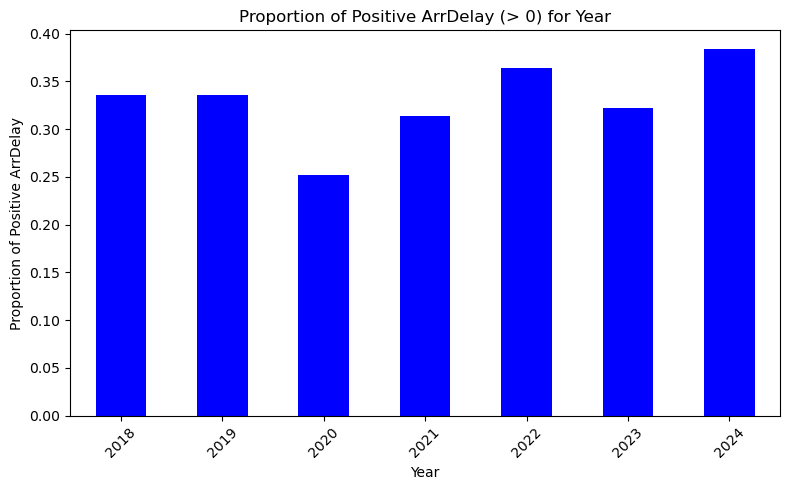

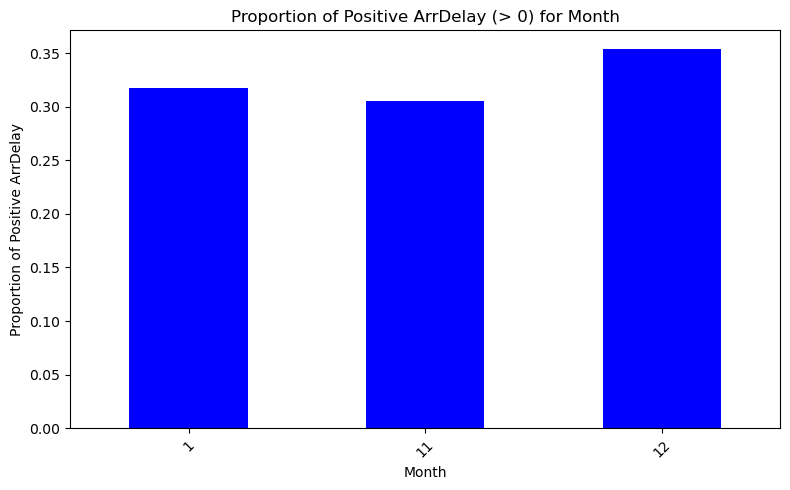

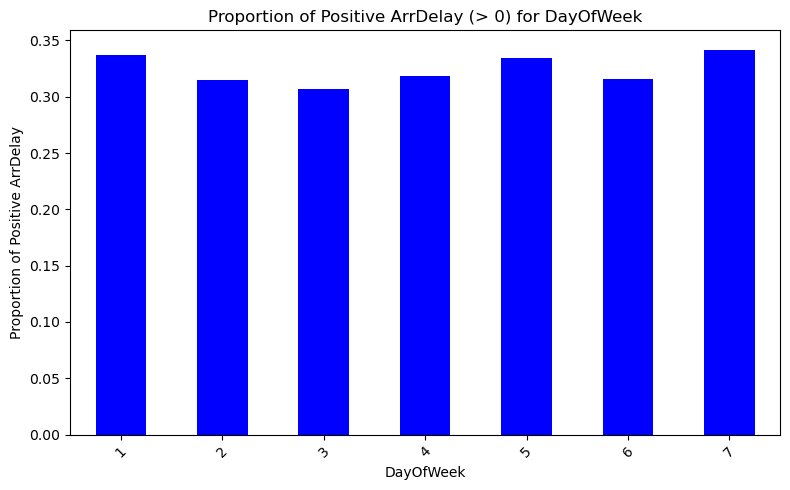

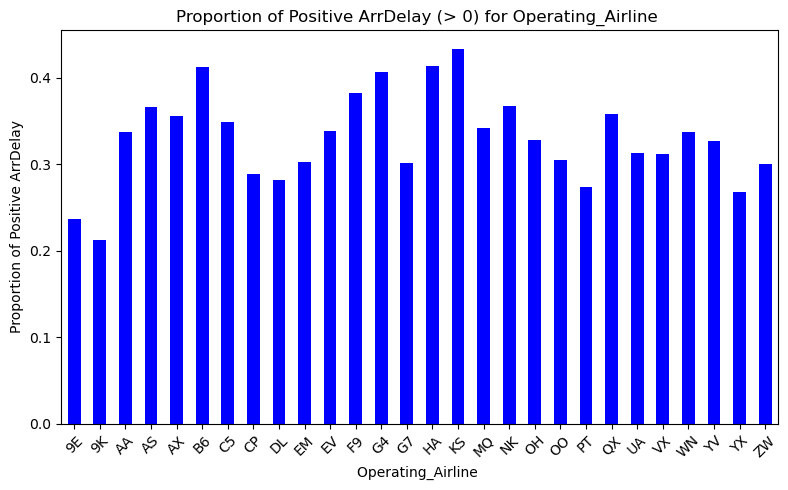

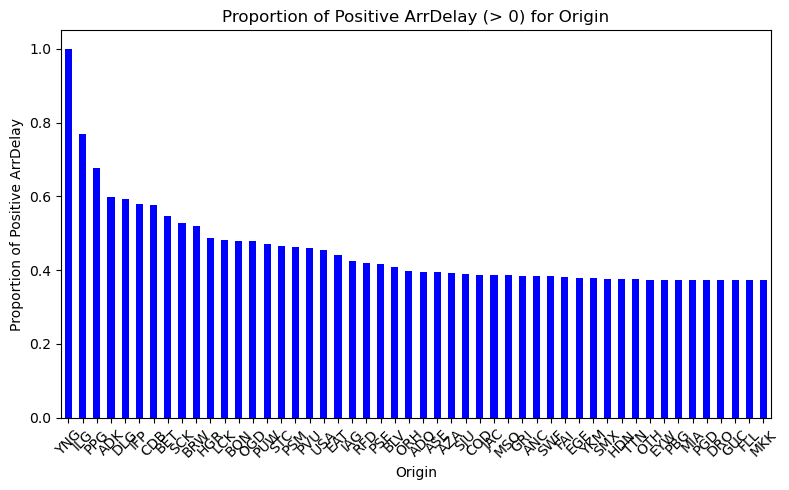

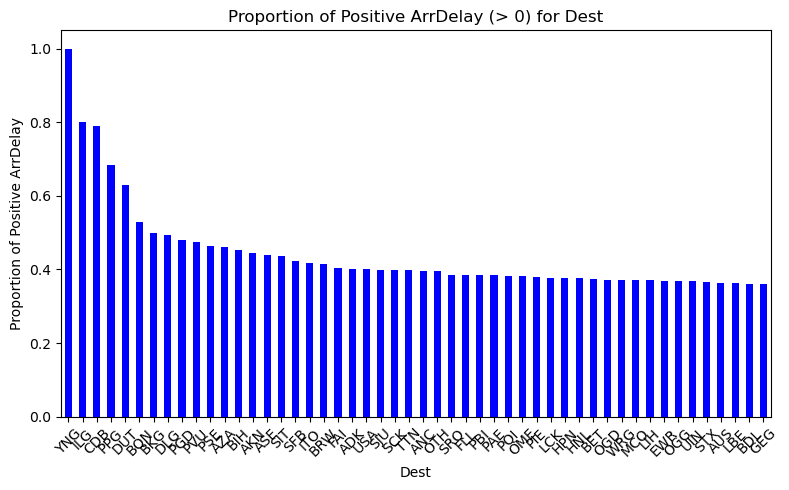

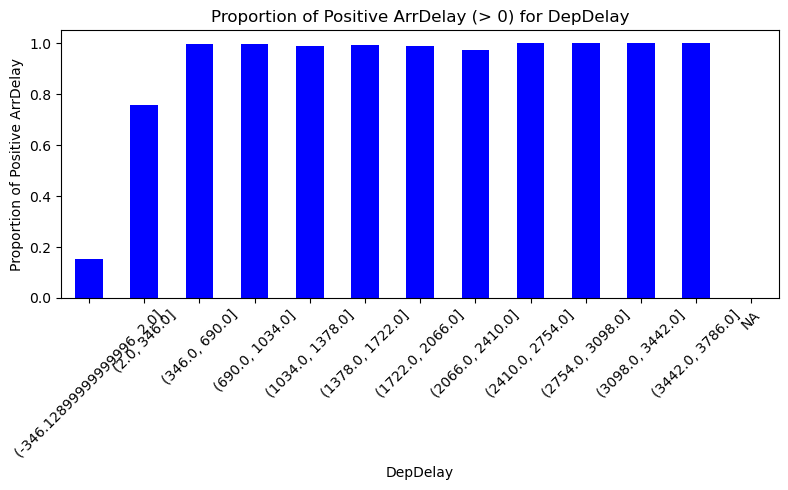

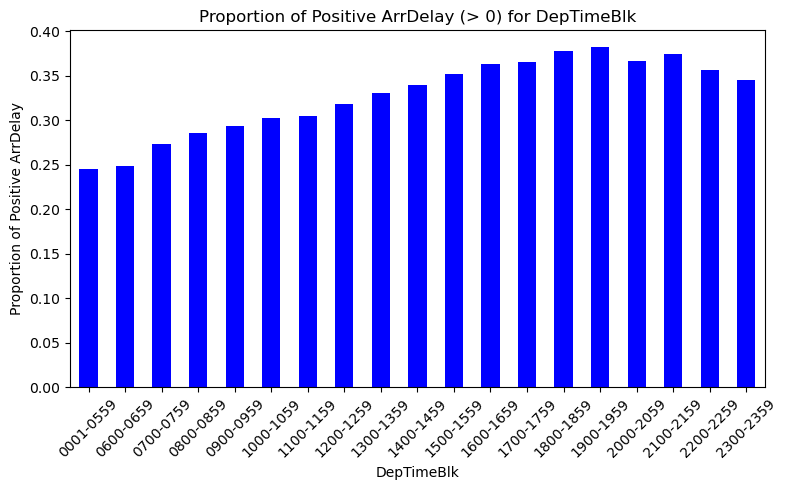

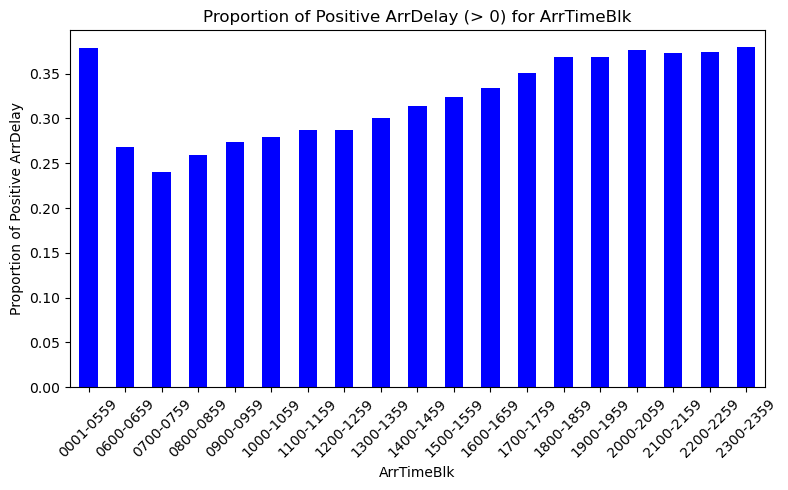

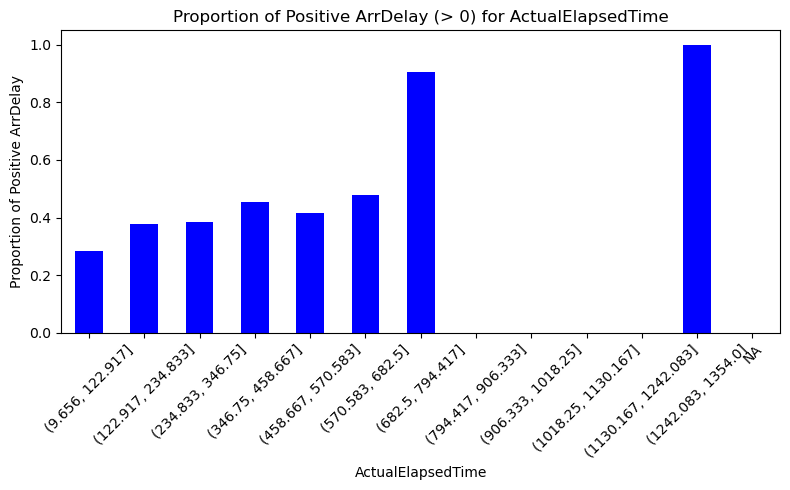

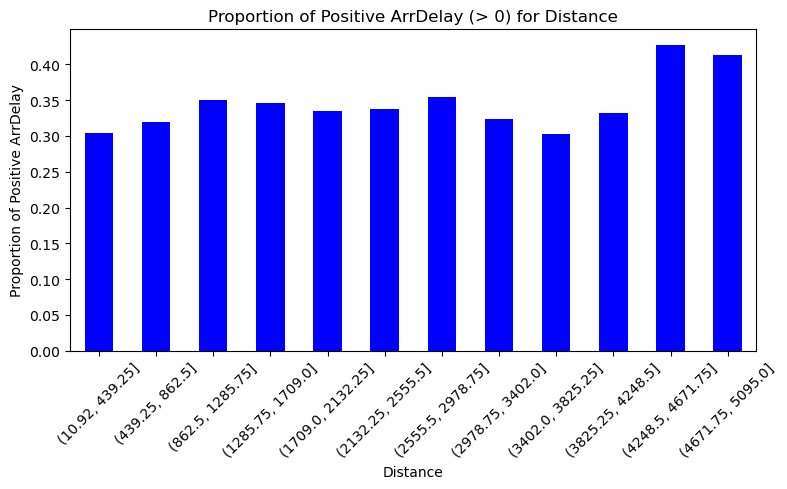

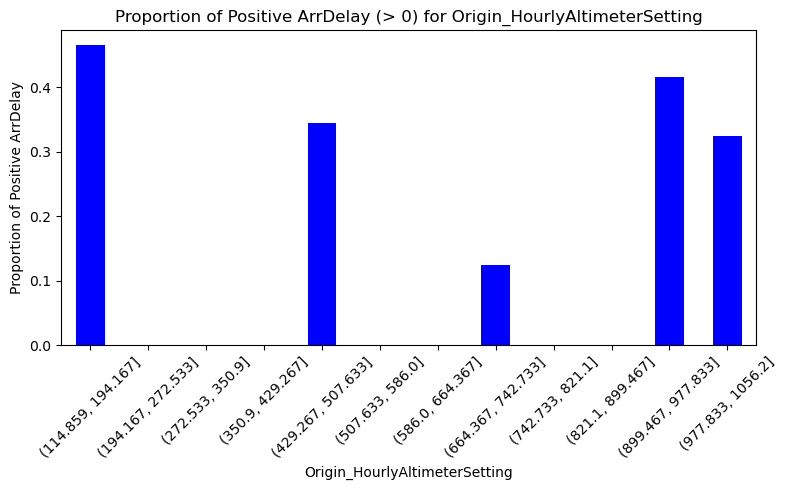

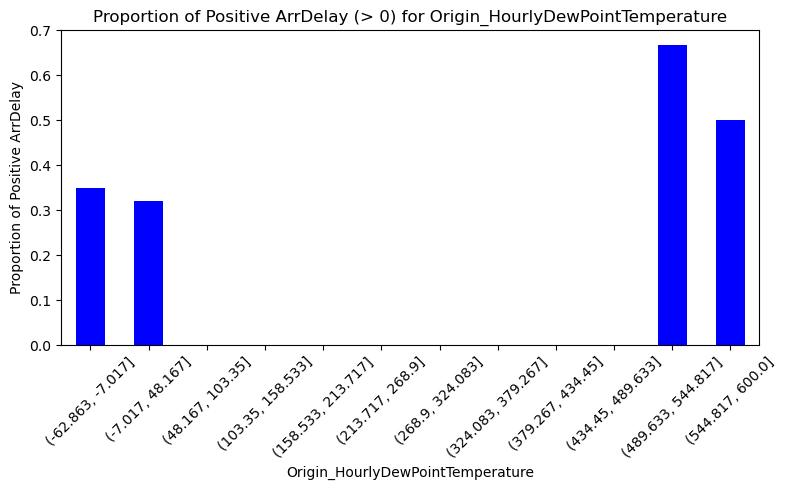

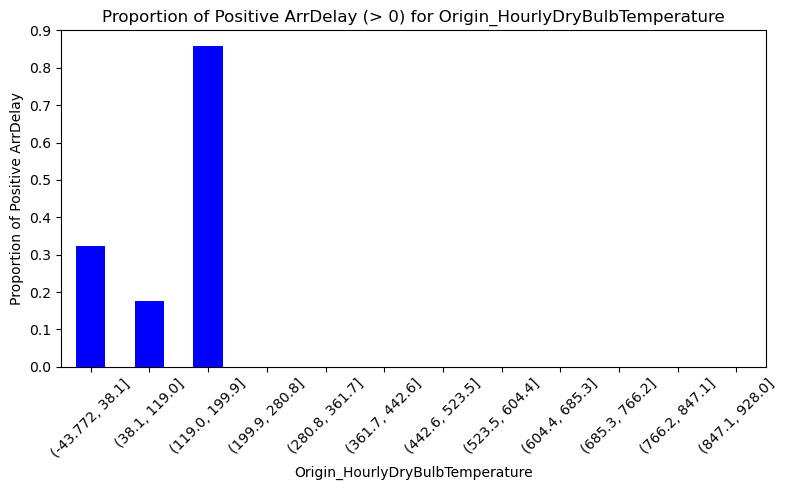

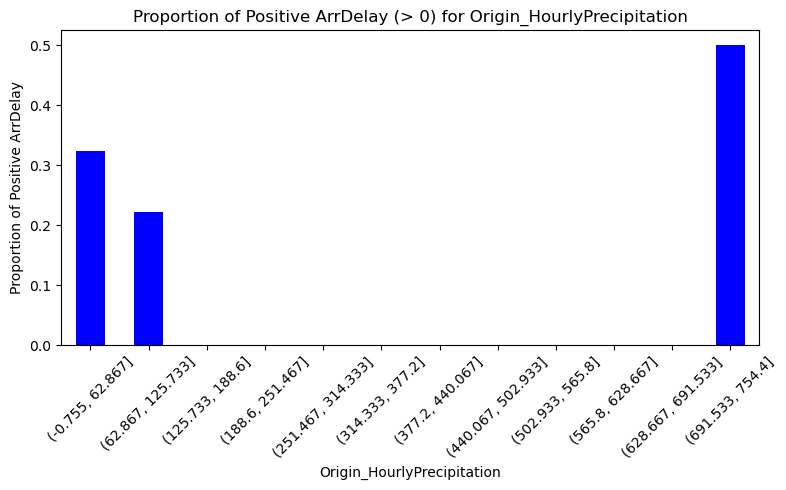

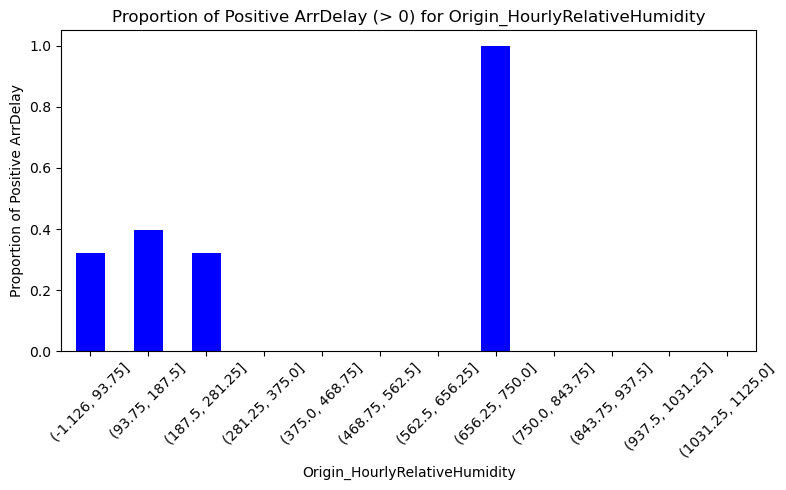

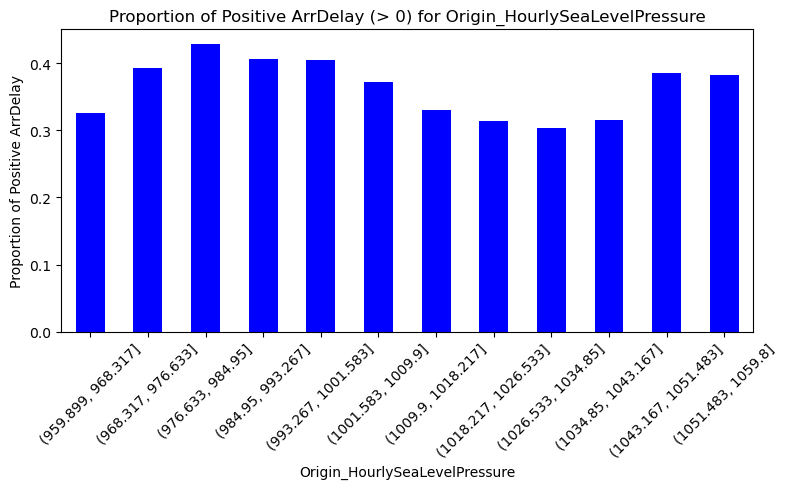

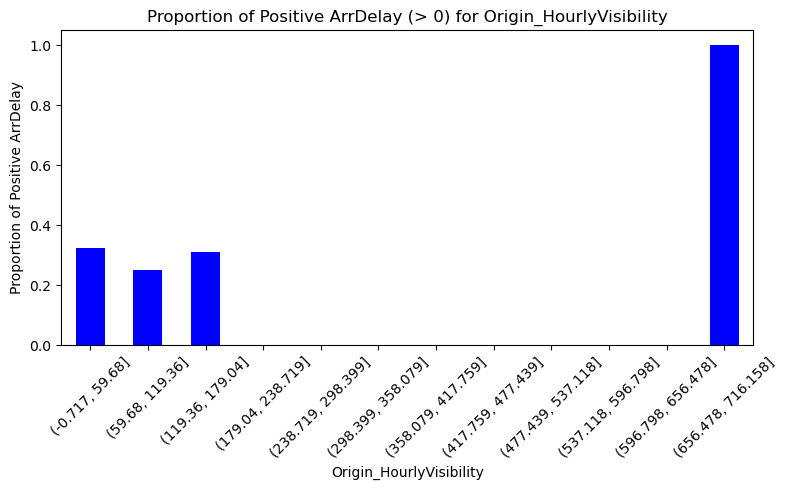

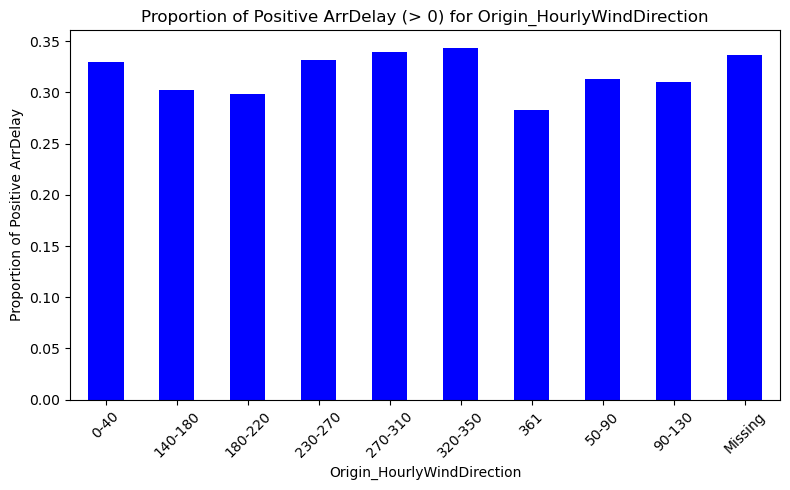

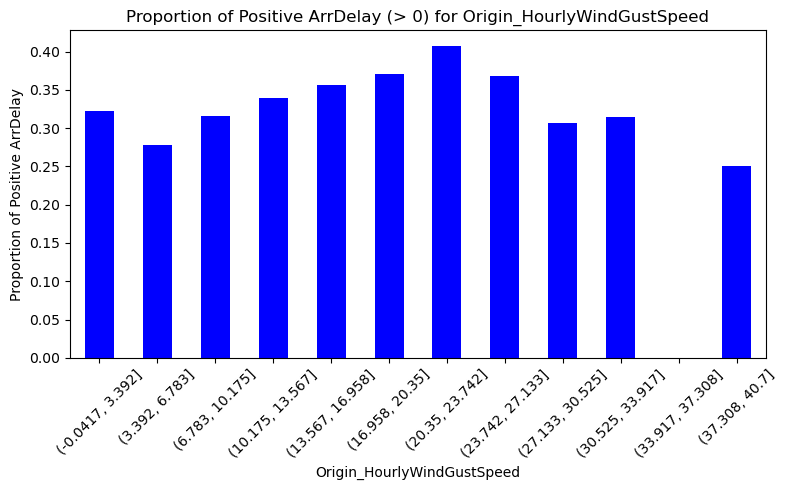

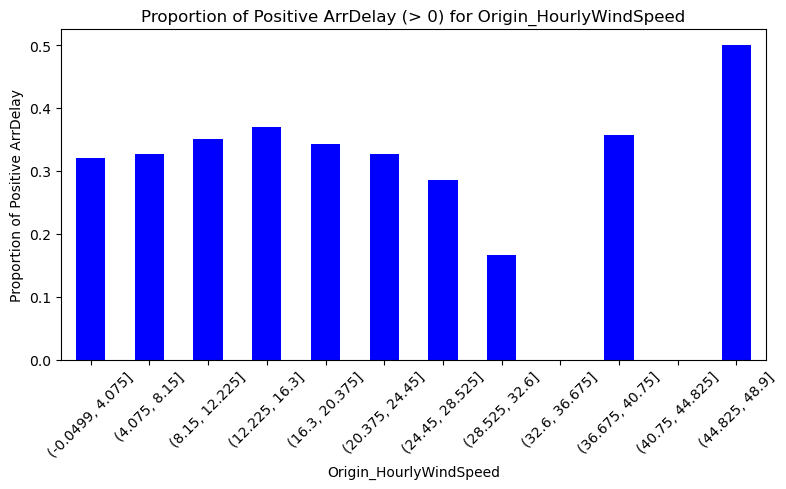

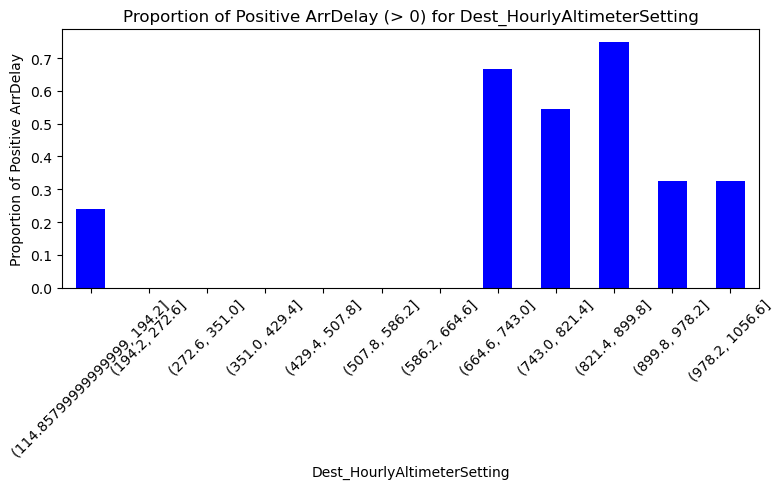

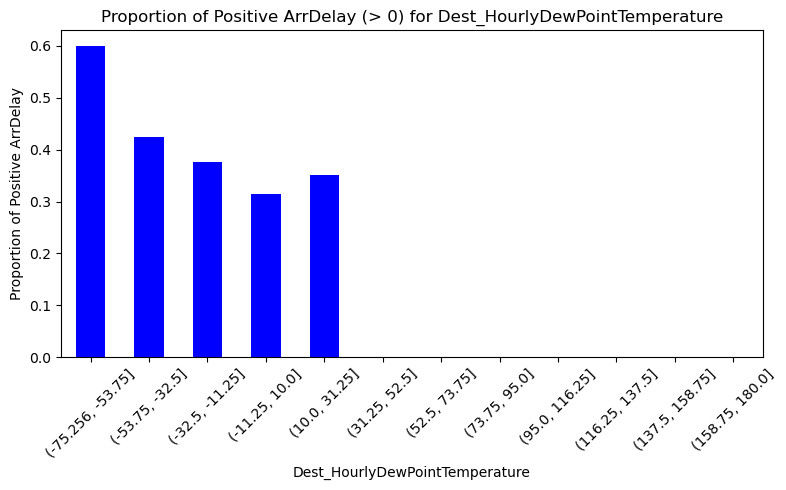

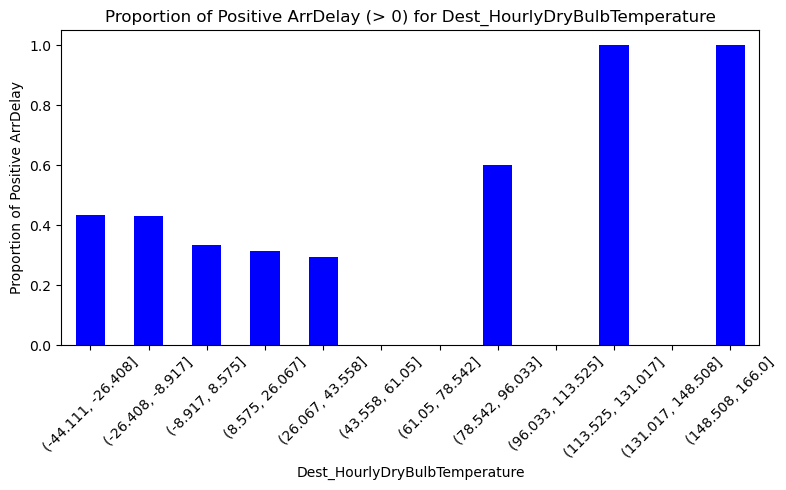

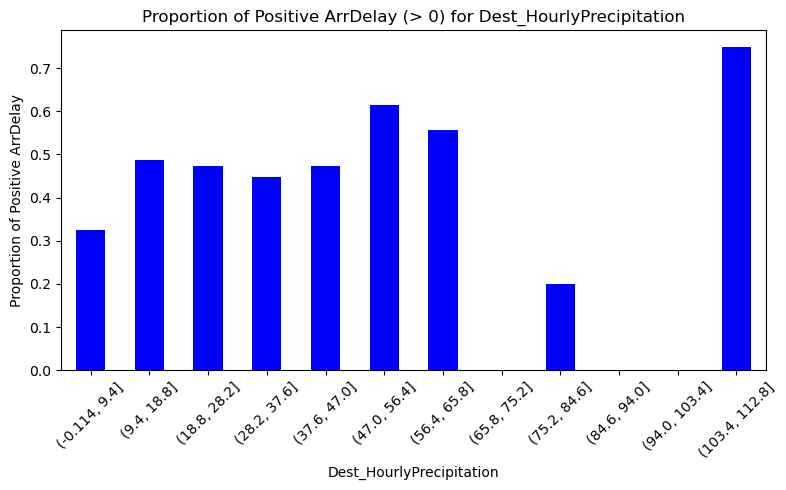

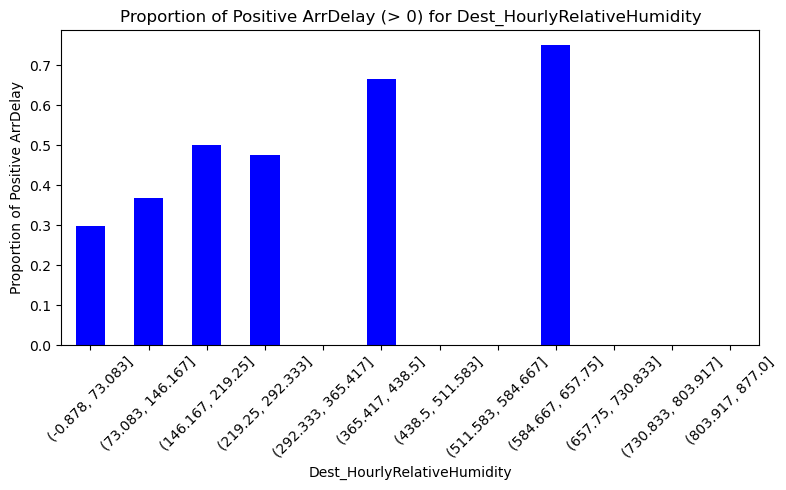

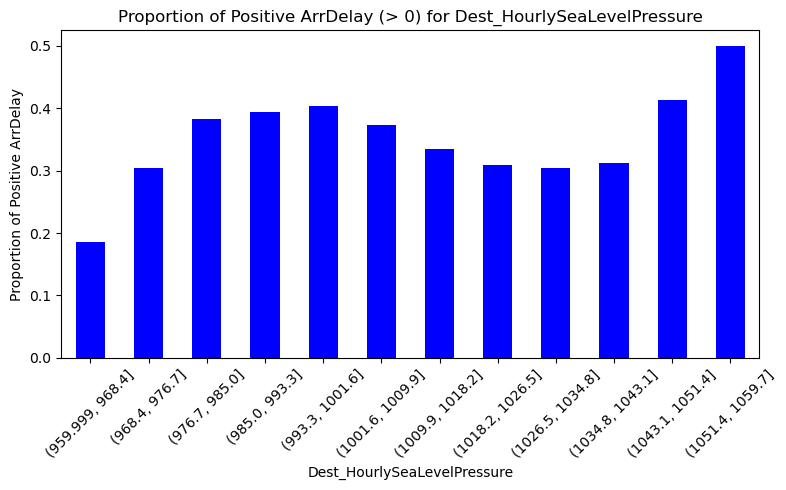

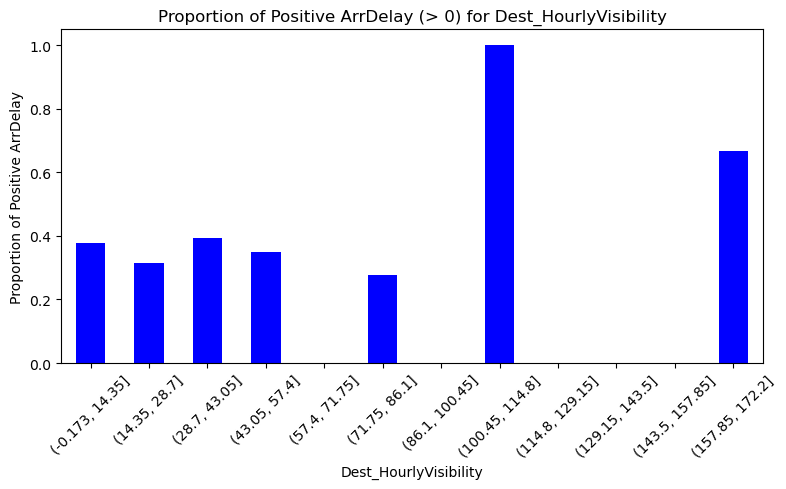

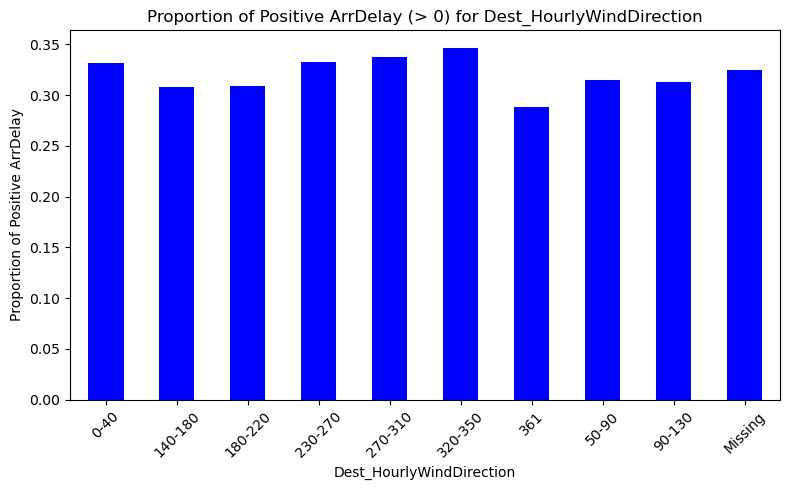

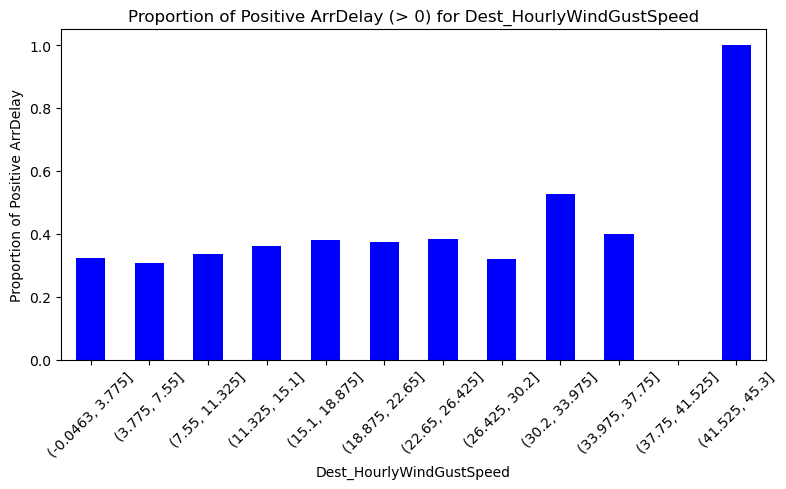

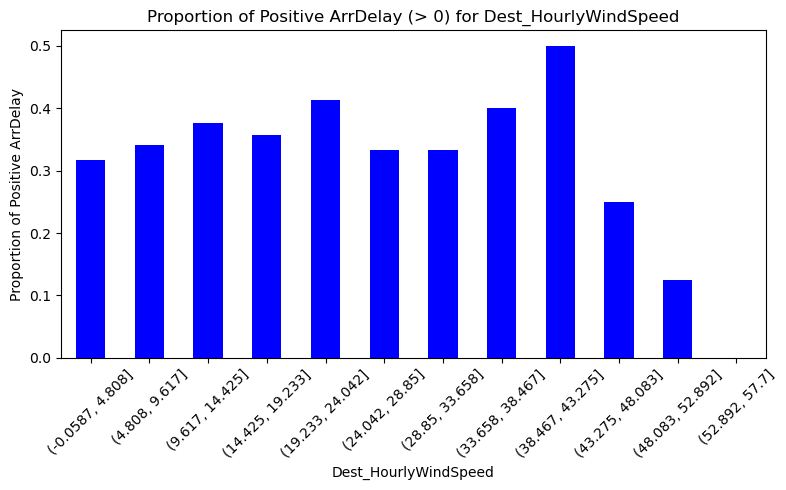

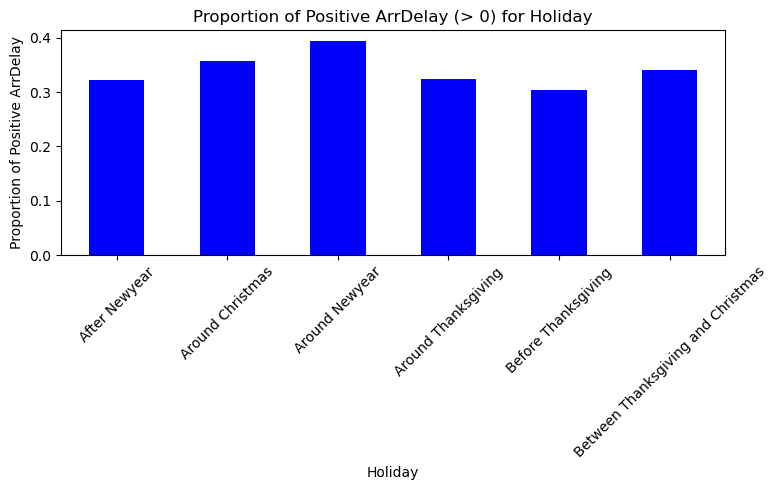

In [12]:
# Initialize dictionary to store individual proportion DataFrames for each column
proportion_frames = {}

for column in data_selected2.columns:
    if column == 'ArrDelay':
        continue
    if data_selected2[column].dtype in ['int64', 'float64']:
        # Numeric columns: create 20 bins, calculate proportion of DepDelay > 0 for each bin
        binned = pd.cut(data_selected2[column], bins=12, include_lowest=True)
        grouped = data_selected2.groupby(binned)['ArrDelay'].apply(lambda x: (x > 0).mean()).reset_index(name='PositiveProportion')
        if data_selected2[column].isna().any():
            na_prop = (data_selected2[data_selected2[column].isna()]['ArrDelay'] > 0).mean()
            grouped = pd.concat([grouped, pd.DataFrame([{'PositiveProportion': na_prop, column: 'NA'}])])
        grouped['Category'] = grouped[binned.name].astype(str)
    else:
        # Categorical columns: calculate proportion of DepDelay > 0 for each category
        grouped = data_selected2.groupby(column)['ArrDelay'].apply(lambda x: (x > 0).mean()).reset_index(name='PositiveProportion')
        grouped.rename(columns={column: 'Category'}, inplace=True)
        if data_selected2[column].isna().any():
            na_prop = (data_selected2[data_selected2[column].isna()]['ArrDelay'] > 0).mean()
            grouped = pd.concat([grouped, pd.DataFrame([{'Category': 'NA', 'PositiveProportion': na_prop}])])
        
        # Limit to top 50 categories if there are more than 50 unique values
        if len(grouped) > 50:
            grouped = grouped.sort_values(by='PositiveProportion', ascending=False).head(50)
    
    proportion_frames[column] = grouped

# Generate separate plots for each column with NA marked in red
for column, df in proportion_frames.items():
    fig, ax = plt.subplots(figsize=(8, 5))
    colors = ['red' if category == 'NA' else 'blue' for category in df['Category']]
    df.plot(kind='bar', x='Category', y='PositiveProportion', ax=ax, color=colors, legend=False)

    ax.set_title(f"Proportion of Positive ArrDelay (> 0) for {column}")
    ax.set_xlabel(f"{column}")
    ax.set_ylabel("Proportion of Positive ArrDelay")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Delay>0（延误时间）的mean

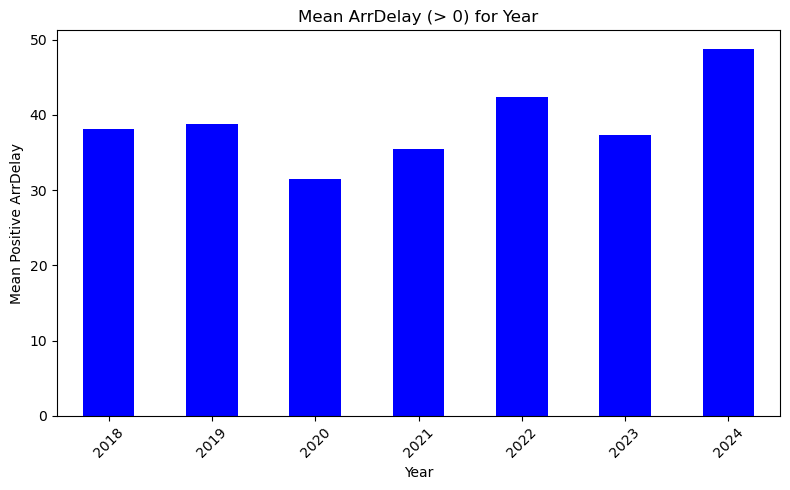

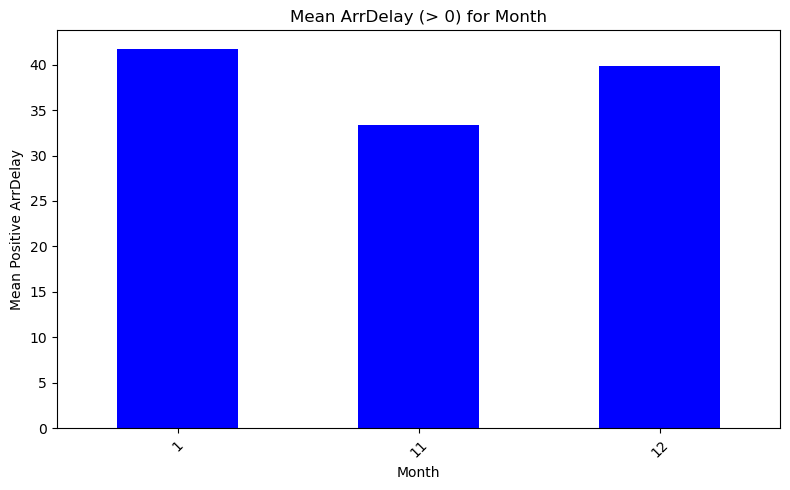

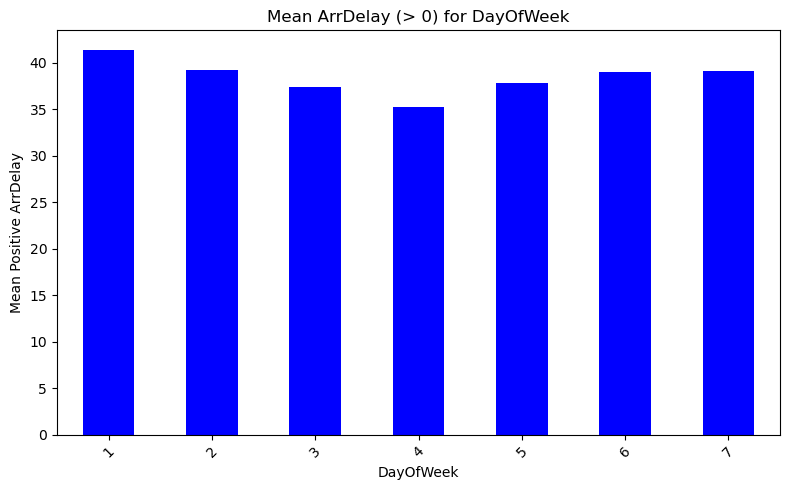

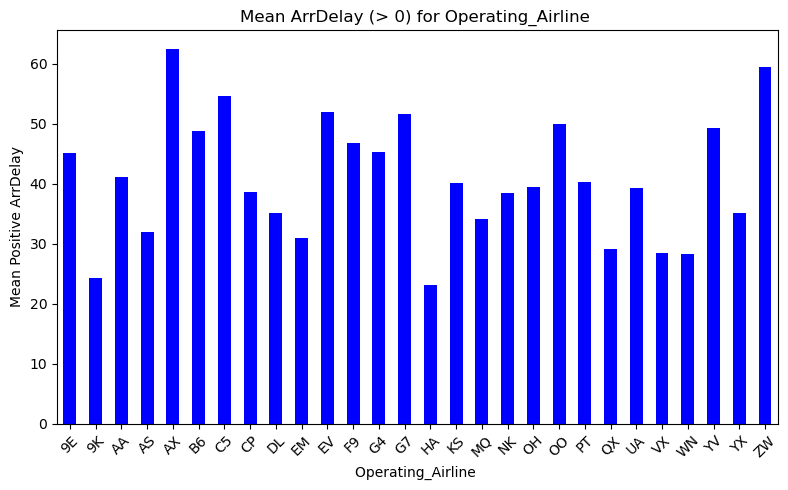

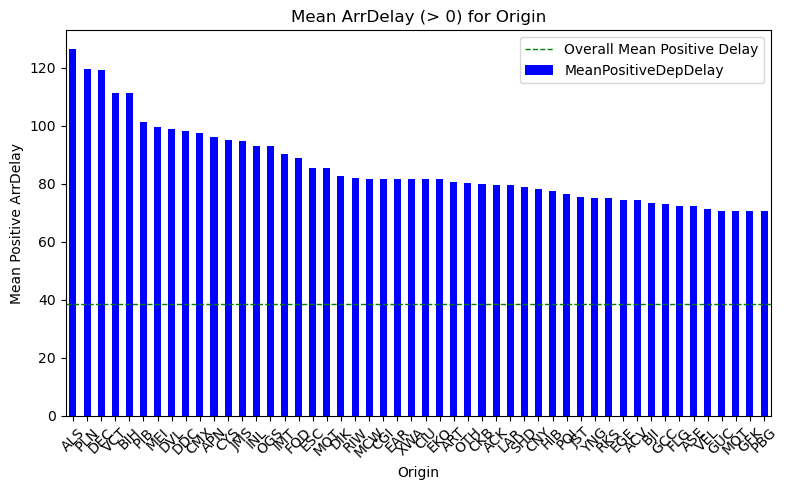

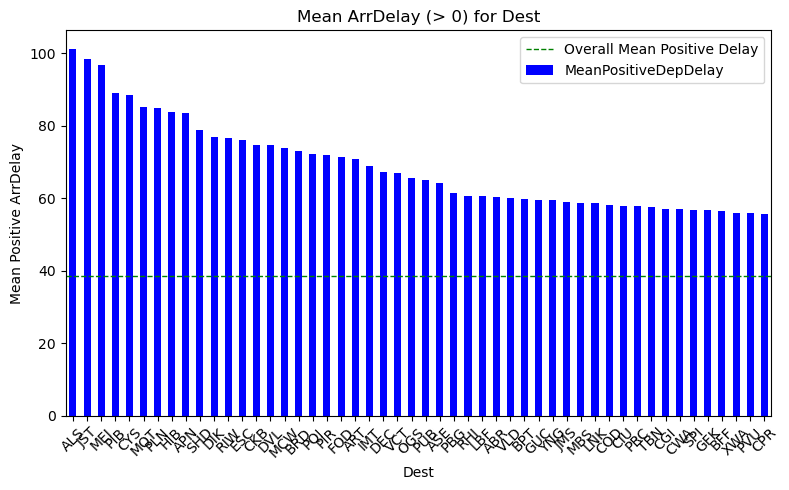

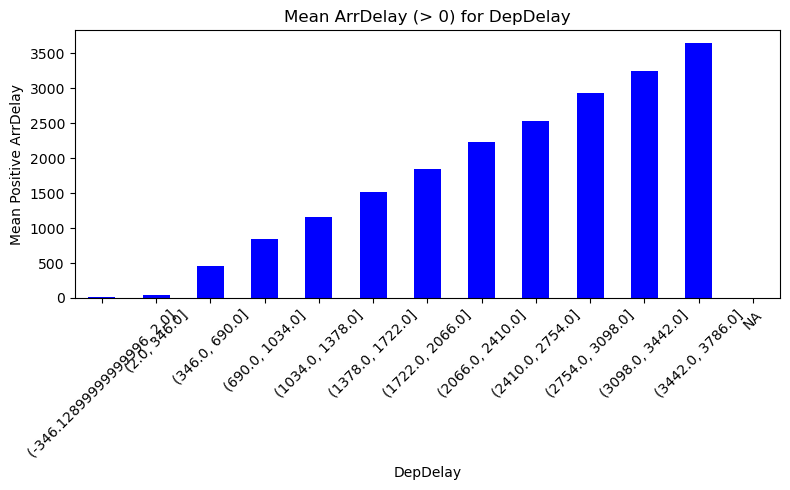

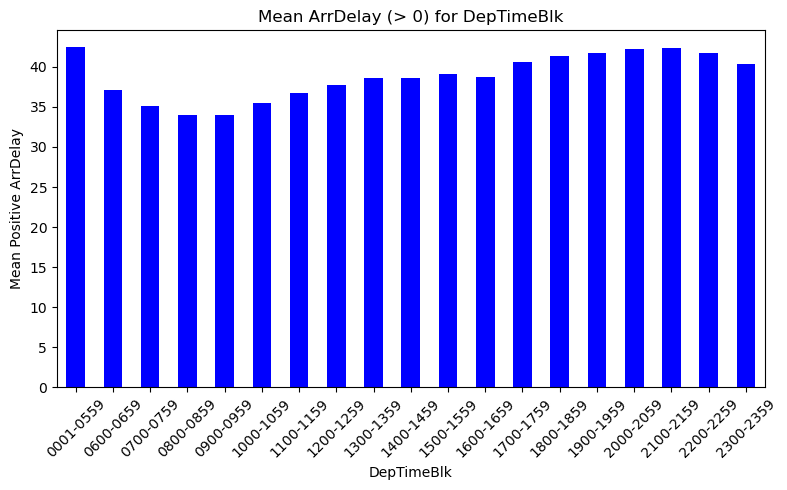

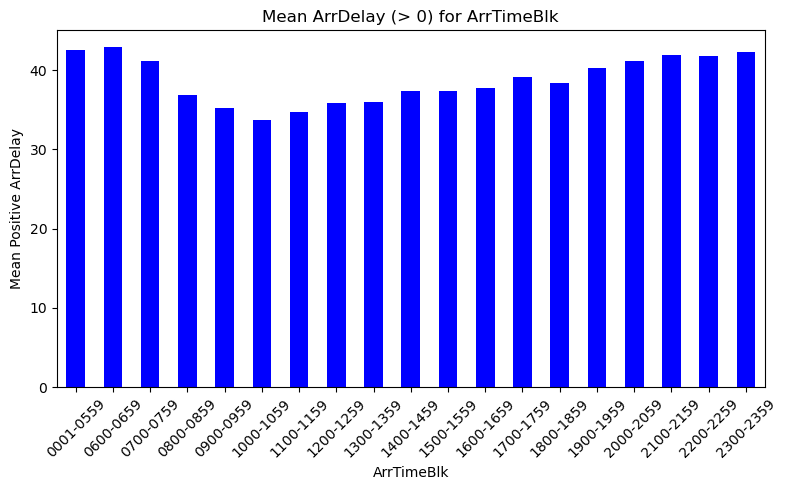

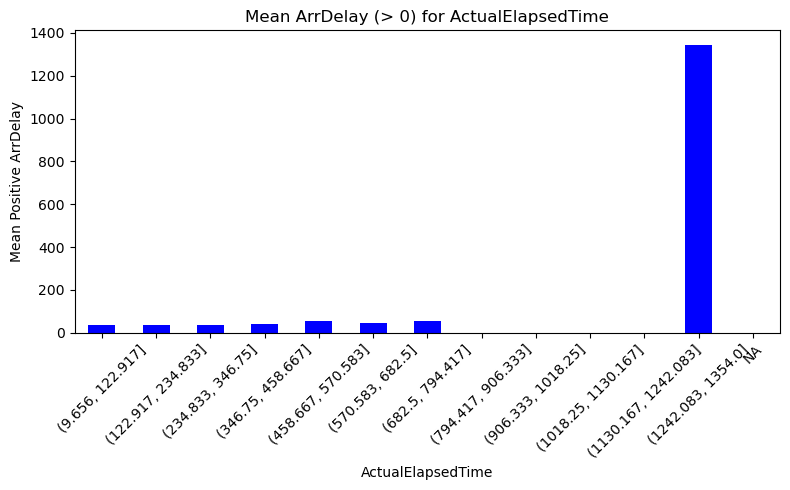

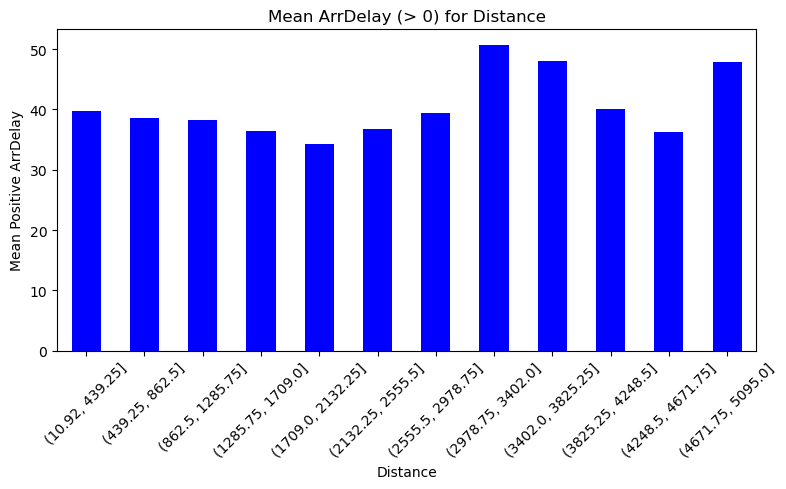

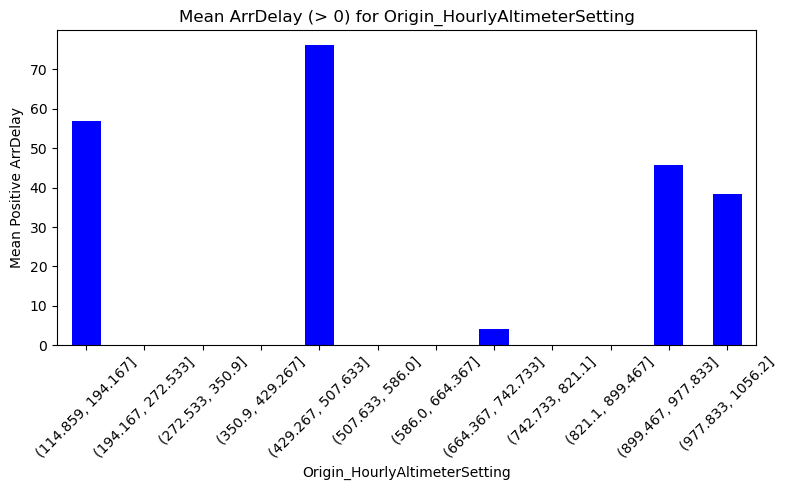

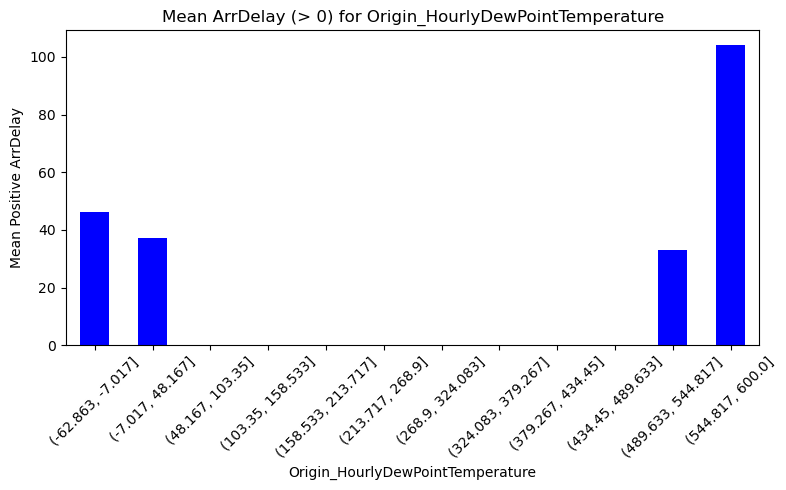

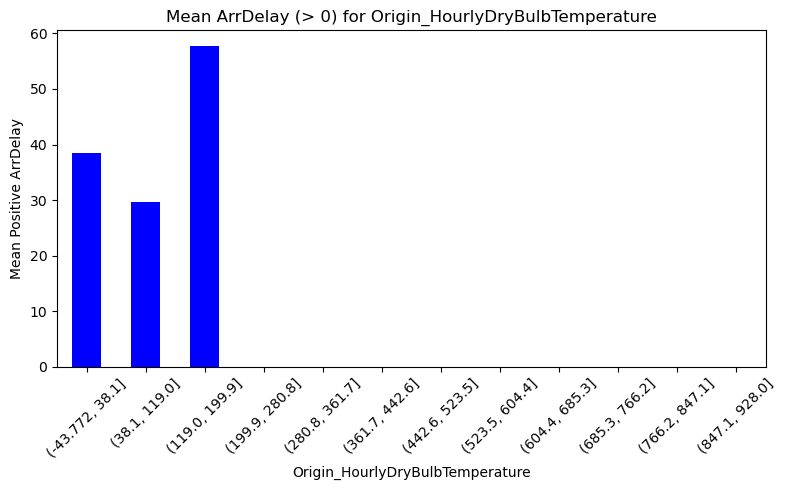

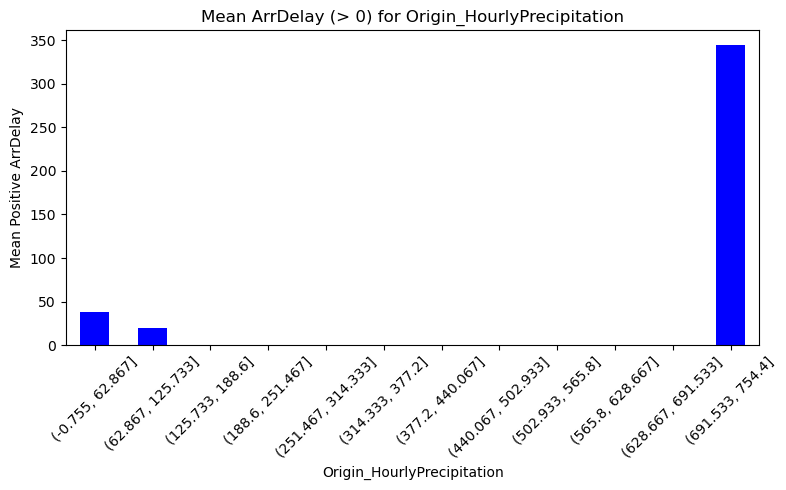

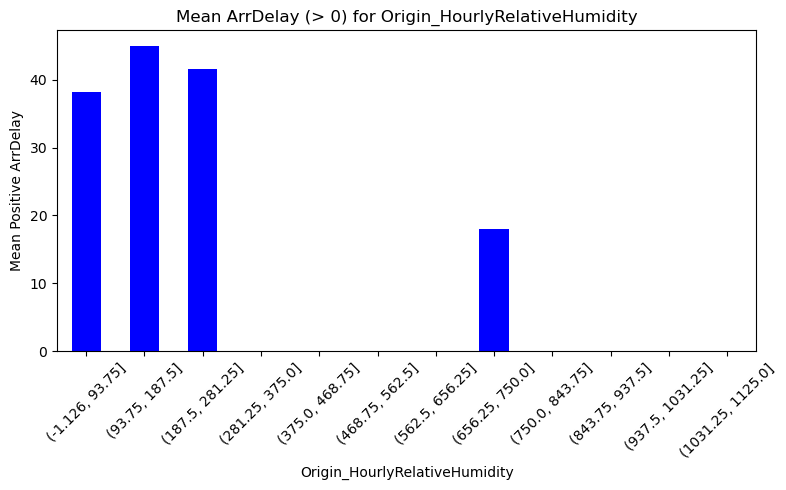

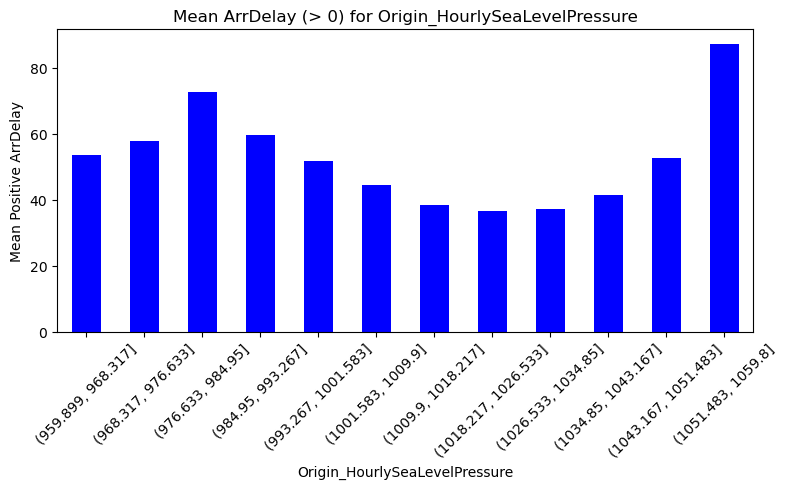

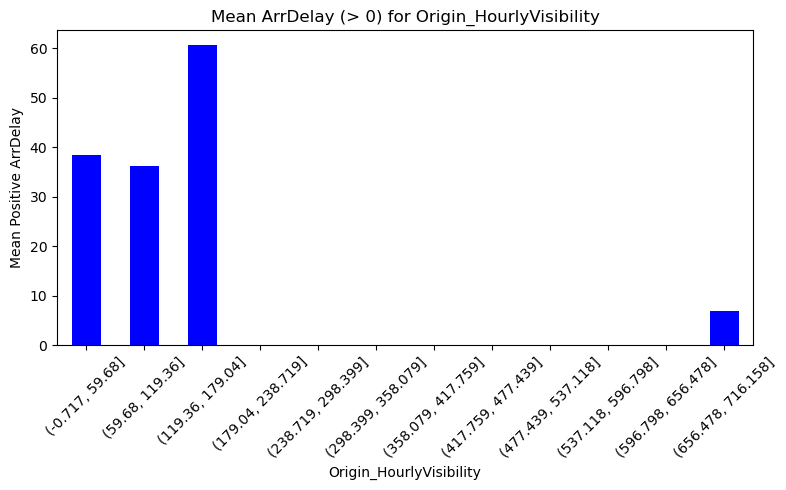

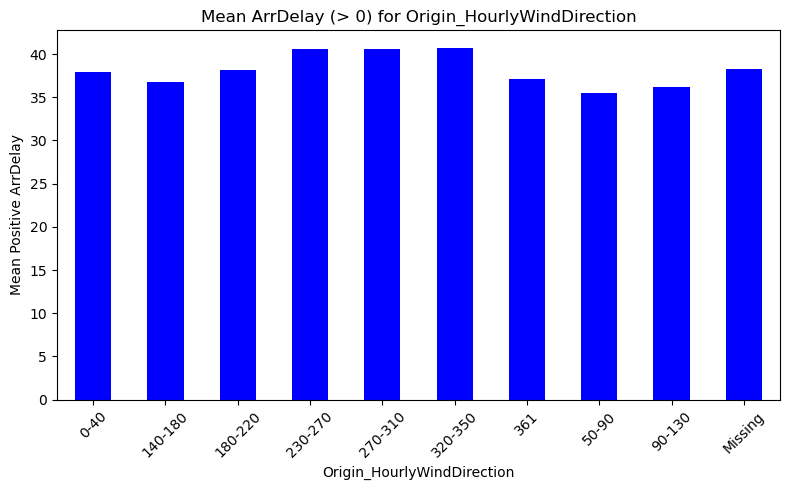

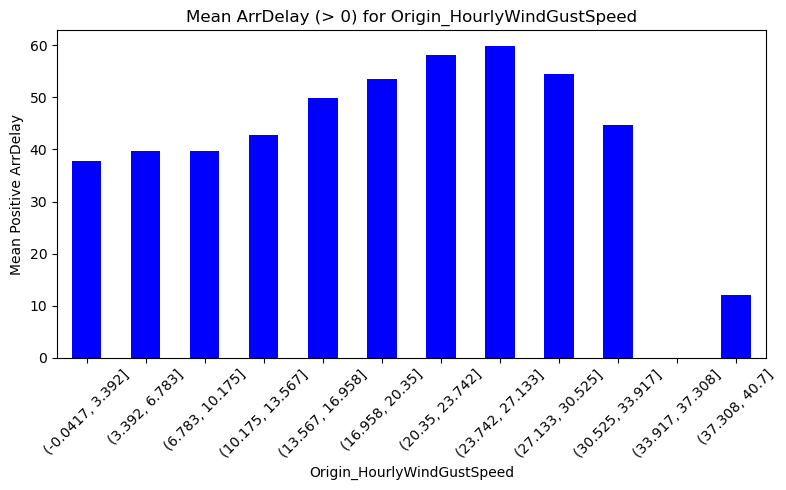

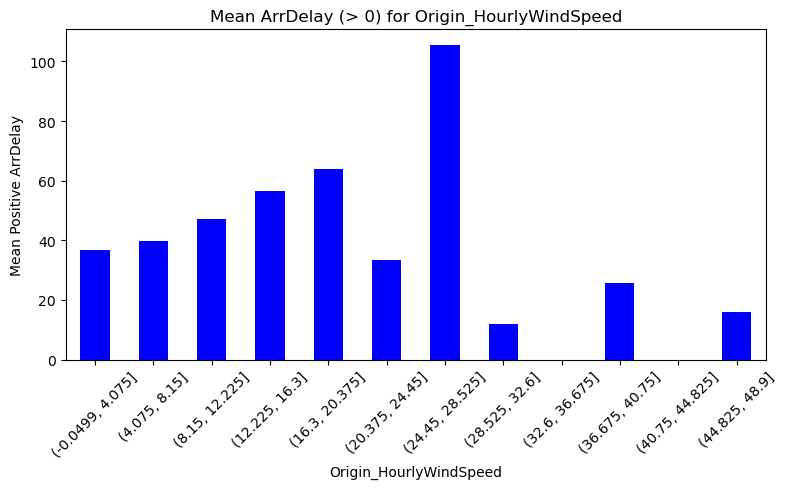

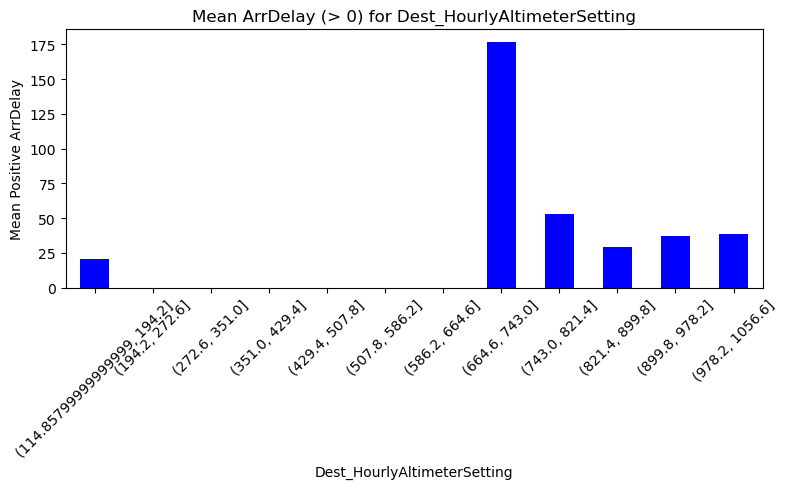

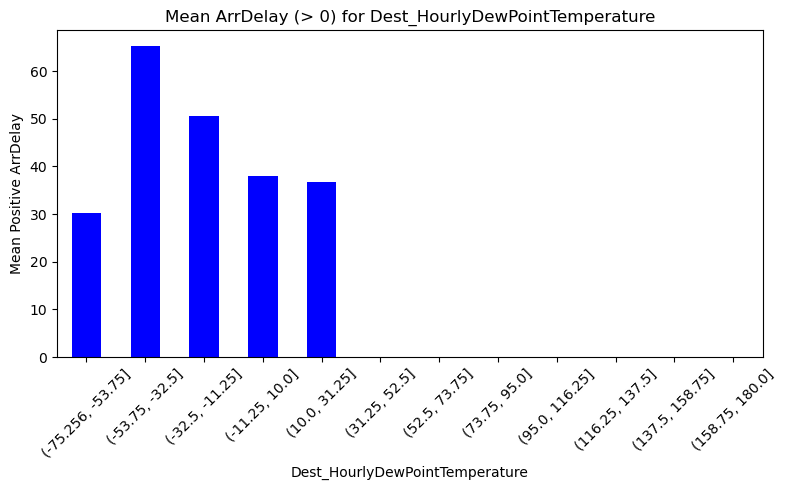

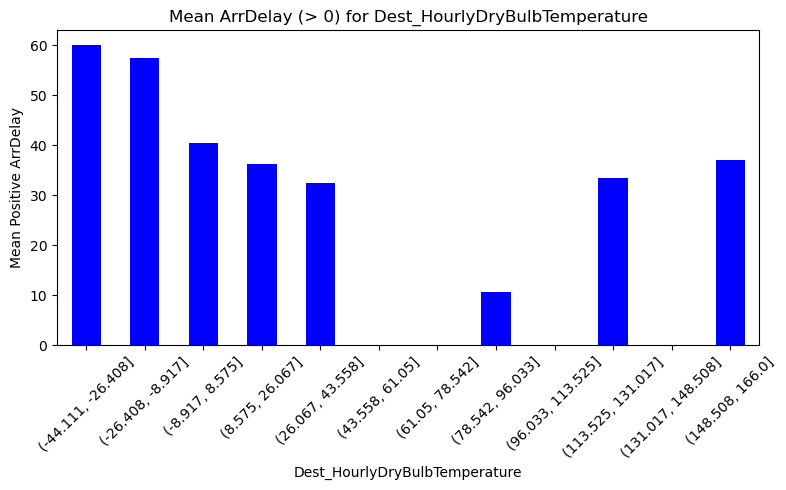

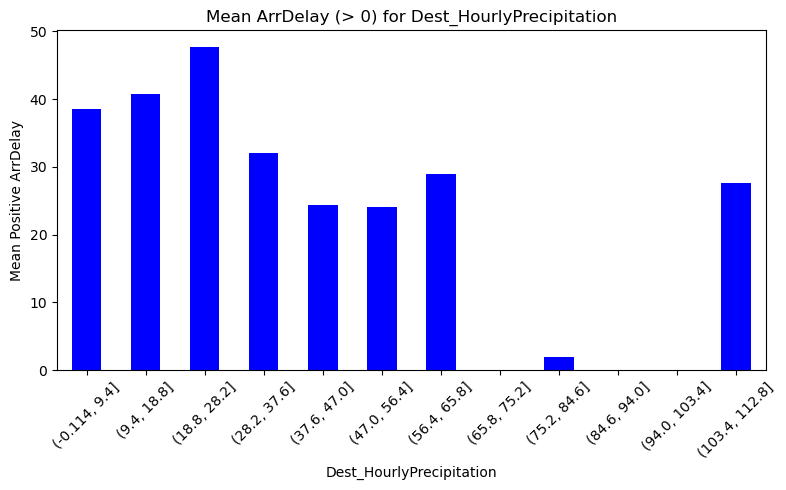

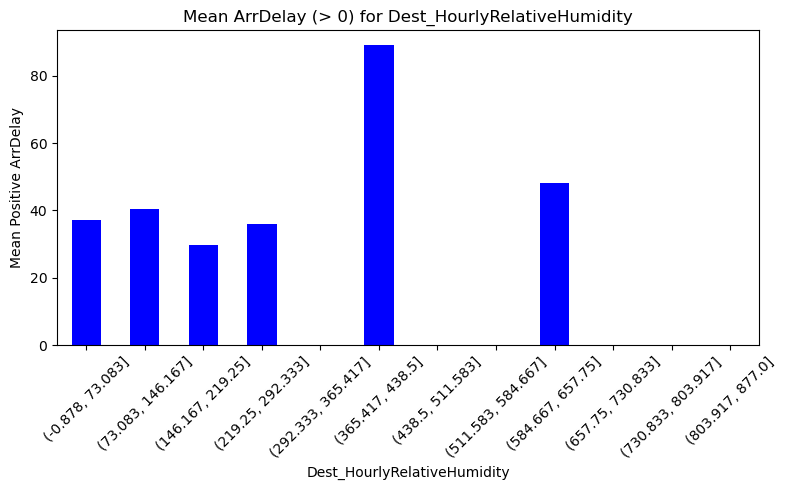

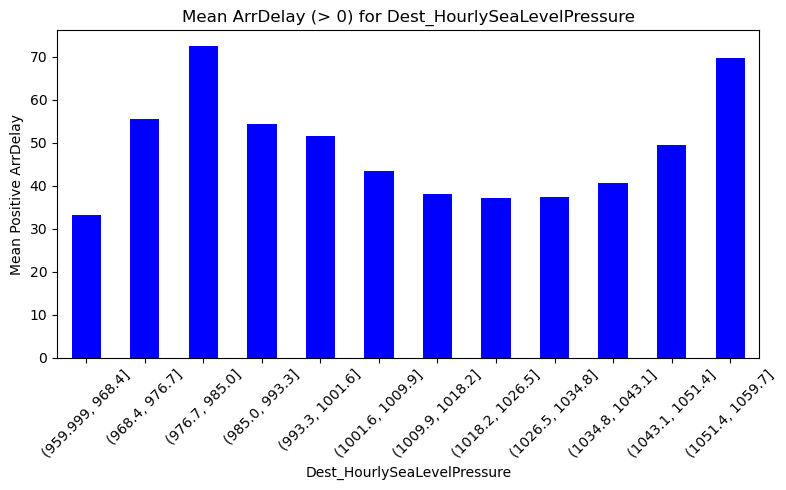

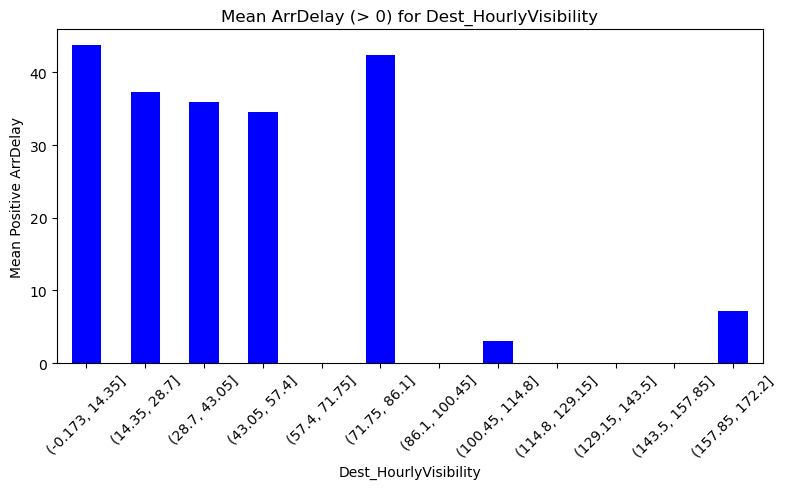

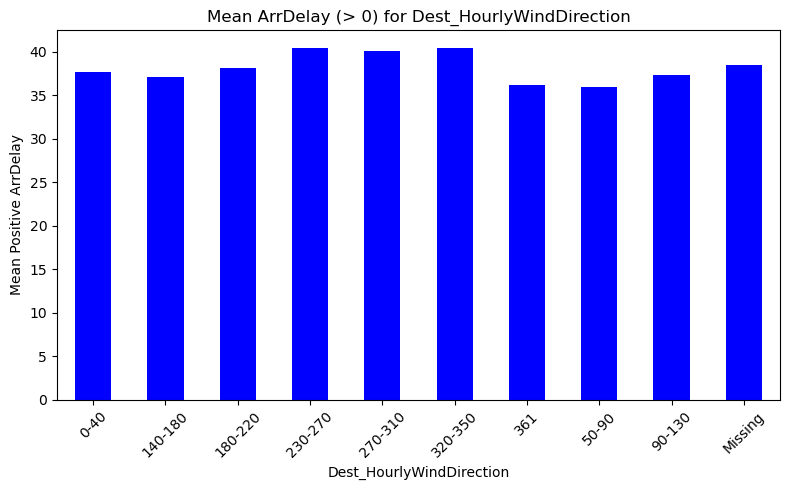

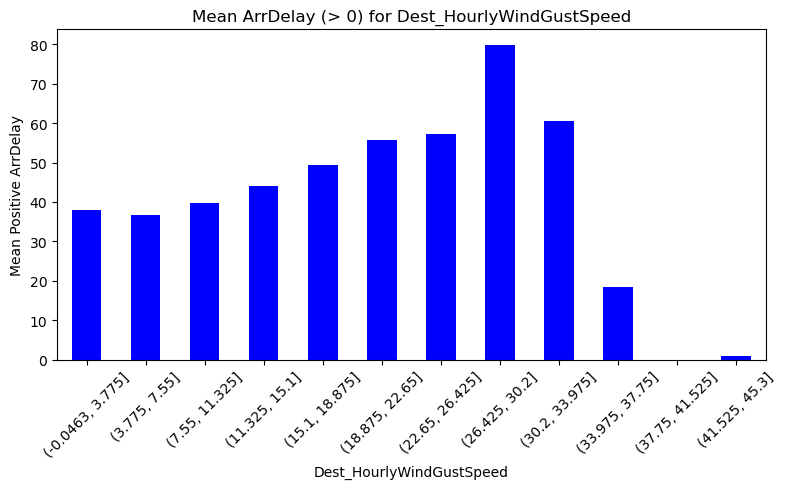

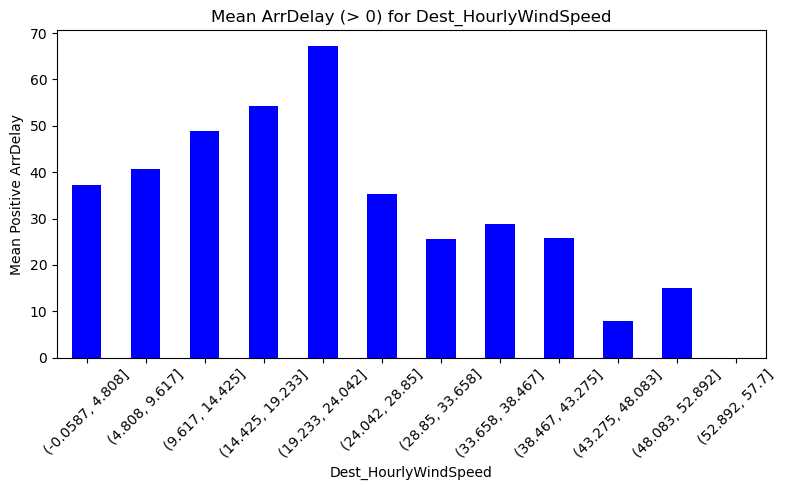

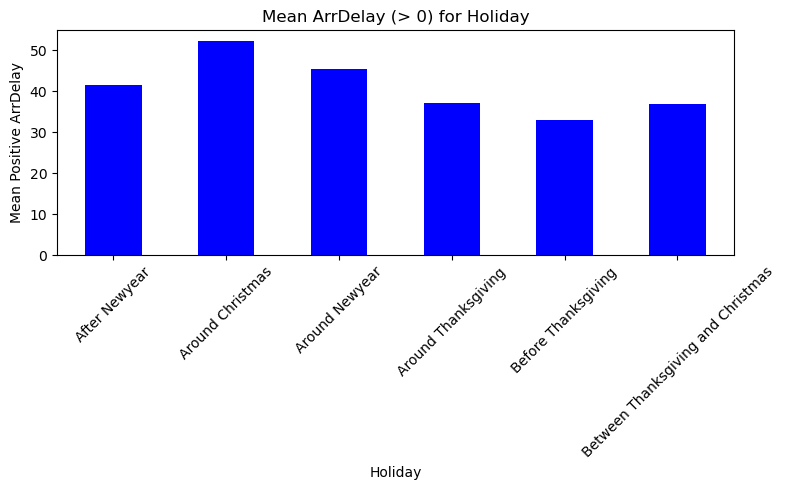

In [13]:
# Initialize dictionary to store individual mean DataFrames for each column
mean_delay_frames = {}

# Calculate overall mean of DepDelay > 0 for reference
overall_mean_positive_delay = data_selected2[data_selected2['ArrDelay'] > 0]['ArrDelay'].mean()

for column in data_selected2.columns:
    if column == 'ArrDelay':
        continue
    if data_selected2[column].dtype in ['int64', 'float64']:
        # Numeric columns: create 20 bins, calculate DepDelay mean for values > 0 in each bin, include NA as a separate bar
        binned = pd.cut(data_selected2[column], bins=12, include_lowest=True)
        grouped = data_selected2[data_selected2['ArrDelay'] > 0].groupby(binned)['ArrDelay'].mean().reset_index(name='MeanPositiveDepDelay')
        if data_selected2[column].isna().any():
            na_mean = data_selected2[(data_selected2[column].isna()) & (data_selected2['ArrDelay'] > 0)]['ArrDelay'].mean()
            grouped = pd.concat([grouped, pd.DataFrame([{'MeanPositiveDepDelay': na_mean, column: 'NA'}])])
        grouped['Category'] = grouped[binned.name].astype(str)
    else:
        # Categorical columns: calculate DepDelay mean for values > 0 in each category
        grouped = data_selected2[data_selected2['ArrDelay'] > 0].groupby(column)['ArrDelay'].mean().reset_index(name='MeanPositiveDepDelay')
        grouped.rename(columns={column: 'Category'}, inplace=True)
        if data_selected2[column].isna().any():
            na_mean = data_selected2[(data_selected2[column].isna()) & (data_selected2['ArrDelay'] > 0)]['ArrDelay'].mean()
            grouped = pd.concat([grouped, pd.DataFrame([{'Category': 'NA', 'MeanPositiveDepDelay': na_mean}])])
        
        # Limit to top 50 categories if there are more than 50 unique values
        if len(grouped) > 50:
            grouped = grouped.sort_values(by='MeanPositiveDepDelay', ascending=False).head(50)
    
    mean_delay_frames[column] = grouped

# Generate separate plots for each column with NA marked in red
for column, df in mean_delay_frames.items():
    fig, ax = plt.subplots(figsize=(8, 5))
    colors = ['red' if category == 'NA' else 'blue' for category in df['Category']]
    df.plot(kind='bar', x='Category', y='MeanPositiveDepDelay', ax=ax, color=colors, legend=False)

    # Add overall mean delay > 0 as a green line for columns with more than 50 unique values
    if len(df) == 50:
        ax.axhline(overall_mean_positive_delay, color='green', linestyle='--', linewidth=1, label='Overall Mean Positive Delay')

    ax.set_title(f"Mean ArrDelay (> 0) for {column}")
    ax.set_xlabel(f"{column}")
    ax.set_ylabel("Mean Positive ArrDelay")
    if len(df) == 50:
        ax.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()